<a href="https://colab.research.google.com/github/akutuva21/frozen/blob/main/ML10701_EfficientNet_replace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is where the code can be downloaded from: https://github.com/fastai/imagenette

In [ ]:
pip install datasets torchsummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

!wget -P /content/drive/MyDrive/ https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xzf /content/drive/MyDrive/imagenette2-160.tgz

--2024-12-08 16:41:39--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.135.248, 52.217.108.70, 52.217.226.88, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.135.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.42M  40.1MB/s    in 2.4s    

2024-12-08 16:41:42 (40.1 MB/s) - ‘/content/drive/MyDrive/imagenette2-160.tgz’ saved [99003388/99003388]



In [ ]:
pip install torchinfo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
#from datasets import load_dataset
from tqdm import tqdm
import torchvision.models as models
# from torchvision.datasets import ImageNet
from torchvision.datasets import ImageFolder
# from fastai.vision.all import *
import matplotlib.pyplot as plt
#from fastai.vision.augment import Resize
from torch.utils.data import DataLoader
import numpy as np


In [ ]:
path = 'imagenette2-160'

In [ ]:
# Define ImageNet normalization statistics
# imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Create common transformations for both training and validation
common_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(*imagenet_stats)
])

# Apply transformations directly to datasets
train_dataset = ImageFolder(root=path + '/train', transform=common_transforms)
val_dataset = ImageFolder(root=path + '/val', transform=common_transforms)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
for images, labels in train_loader:
    shape  = images.size()
    print(images.size())  # This will give you the size of the images batch
    break  # Exit after the first batch

torch.Size([64, 3, 224, 224])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pretrained EfficientNet model
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
model.to(device)

# Summarize the model using torchinfo
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224))
print(model)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 59.4MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
num_classes = len(train_dataset.classes)
print(num_classes)

10


In [ ]:
# Training and evaluation functions
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(dataloader)

def evaluate(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradients for faster inference
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)  # Move to device

            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predictions

            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = correct_predictions / total_samples
    return accuracy

In [ ]:
### ORIGINAL - NO CHANGES BESIDES LAST LAYER

# Freeze all parameters
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier (final layer)
num_classes = 10  # Change this to the number of classes in your dataset
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Unfreeze the new classifier layer
for param in model.classifier.parameters():
    param.requires_grad = True


optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
criterion = nn.CrossEntropyLoss()

TypeError: 'Linear' object is not subscriptable

In [ ]:
# Training loop
num_epochs = 10
train_losses = np.zeros(num_epochs)
val_accuracies = np.zeros(num_epochs)
for epoch in np.arange(num_epochs):
    train_losses[epoch] = train(model, train_loader, criterion, optimizer, device)
    val_accuracies[epoch] = evaluate(model, val_loader, device)
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[epoch]:.4f}, Val Accuracy: {val_accuracies[epoch]:.4f}")

100%|██████████| 62/62 [04:59<00:00,  4.84s/it]


Epoch 1, Train Loss: 0.5547, Val Accuracy: 0.9671


100%|██████████| 62/62 [04:52<00:00,  4.72s/it]


Epoch 2, Train Loss: 0.1694, Val Accuracy: 0.9717


100%|██████████| 62/62 [05:19<00:00,  5.16s/it]


Epoch 3, Train Loss: 0.1329, Val Accuracy: 0.9732


100%|██████████| 62/62 [04:27<00:00,  4.32s/it]


Epoch 4, Train Loss: 0.1114, Val Accuracy: 0.9738


100%|██████████| 62/62 [04:50<00:00,  4.68s/it]


Epoch 5, Train Loss: 0.1009, Val Accuracy: 0.9750


100%|██████████| 62/62 [05:42<00:00,  5.52s/it]


Epoch 6, Train Loss: 0.0877, Val Accuracy: 0.9758


  5%|▍         | 7/148 [00:40<13:35,  5.79s/it]

In [ ]:
train_losses

array([0.06513736, 0.06383715, 0.058279  , 0.05473105, 0.04937279,
       0.05049743, 0.04141252, 0.04183874, 0.04113671, 0.03865826])

In [ ]:
#First layer replaced with original classification head
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim

# Custom EfficientNet wrapper
class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()

        # Use the original EfficientNet feature extractor
        self.features = base_model.features

        # Replace the classification layer (classifier head)
        # EfficientNet-B0 has a head composed of an AdaptiveAvgPool2d layer and a final linear classifier
        self.conv_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten(),            # Flatten the feature map
            nn.Linear(1280, num_classes)  # Final fully connected layer
        )

    def forward(self, x):
        print("Input Shape:", x.shape)  # Debugging input shape
        x = self.features(x)  # Pass through EfficientNet feature extractor
        print("Features Output Shape:", x.shape)  # Debugging shape after feature extractor
        x = self.conv_head(x)  # Pass through the classification head
        print("Classifier Output Shape:", x.shape)  # Debugging shape after classification
        return x


# Load pretrained EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT).to(device)
num_classes = 10  # Example number of classes for your dataset

# Instantiate the custom model
model = CustomEfficientNet(base_model, num_classes).to(device)

# Debugging with dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)
with torch.no_grad():
    output = model(dummy_input)  # Verify shapes step by step

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Example training loop
num_epochs = 10
train_loss = []
val_accuracy = []

for epoch in range(num_epochs):
    train_loss_epoch = train(model, train_loader, criterion, optimizer, device)
    val_accuracy_epoch = evaluate(model, val_loader, device)
    train_loss.append(train_loss_epoch)
    val_accuracy.append(val_accuracy_epoch)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_epoch:.4f}, Val Accuracy: {val_accuracy_epoch:.4f}")

print("val_accuray_simplified=", val_accuracy)
print("train_loss_simplified=", train_loss)


Input Shape: torch.Size([1, 3, 224, 224])
Features Output Shape: torch.Size([1, 1280, 7, 7])
Classifier Output Shape: torch.Size([1, 10])


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:20,  1.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:13,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:59,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:58,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:58,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:57,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:56,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:00,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:08,  1.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:13,  1.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:12,  1.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:10<01:14,  1.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:11,  1.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:11<01:08,  1.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:14,  1.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:12<01:20,  1.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:13<01:22,  1.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:14<01:25,  1.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:14<01:15,  1.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:15<01:10,  1.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:15<01:03,  1.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:15<00:59,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:16<00:56,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:16<00:55,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:17<00:53,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:17<00:51,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:18<00:54,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:18<00:55,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:19<00:53,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:19<00:51,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:20<00:50,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:20<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:20<00:47,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:21<00:46,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:21<00:46,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:22<00:50,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:22<00:48,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:23<00:49,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:23<00:46,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:24<00:45,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:25<00:56,  1.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:25<01:06,  1.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:26<01:00,  1.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:26<00:55,  1.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:27<00:55,  1.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:28<00:50,  1.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:28<00:46,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:28<00:43,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:29<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:29<00:40,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:30<00:41,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:30<00:42,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:31<00:44,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:31<00:41,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:32<00:39,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:32<00:37,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:33<00:36,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:33<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:34<00:39,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:34<00:40,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:35<00:37,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:35<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:35<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:36<00:38,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:37<00:39,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:37<00:38,  1.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:38<00:36,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:38<00:35,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:39<00:34,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:39<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:39<00:31,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:40<00:30,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:40<00:29,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:41<00:28,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:41<00:27,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:42<00:27,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:42<00:26,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:42<00:25,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:43<00:25,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:43<00:24,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:44<00:24,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:44<00:23,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:45<00:23,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:45<00:23,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:45<00:22,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:46<00:22,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:46<00:21,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:47<00:21,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:47<00:21,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:48<00:20,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:48<00:20,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:48<00:19,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:49<00:19,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:49<00:19,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:50<00:19,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:50<00:19,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:51<00:19,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:51<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:52<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:52<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:52<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:53<00:16,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:53<00:15,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:54<00:15,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:54<00:14,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:55<00:14,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:55<00:13,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:13,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:56<00:12,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:12,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:57<00:11,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:57<00:11,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:58<00:10,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:10,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:10,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:59<00:09,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:09,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [01:00<00:08,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:07,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:07,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:06,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:06<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.35it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:16,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:14,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:10,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:10,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:06,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:05,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:05,  3.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.20it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 1, Train Loss: 0.3076, Val Accuracy: 0.9478


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:04,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:07,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:07,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:06,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:00,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:59,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:58,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:57,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:54,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:53,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:53,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:52,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:52,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:51,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:50,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:50,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:49,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:53,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:53,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:53,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:51,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:49,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:46,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:45,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:44,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:43,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:43,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:41,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:41,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:40,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:40,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:39,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:38,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:37,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:38,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:40,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:40,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:40,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:39,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:37,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:35,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:32,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:32,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:31,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:31,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:30,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:30,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:29,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:29,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:28,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:28,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:28,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:27,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:27,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:26,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:26,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:26,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:26,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:27,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:27,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:40<00:26,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:26,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:25,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:24,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:23,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:22,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:21,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:44<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:45<00:19,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:46<00:18,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:18,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:47<00:17,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:16,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:48<00:16,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:49<00:15,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:14,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:51<00:13,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:14,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:52<00:14,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:13,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:53<00:13,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:12,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:54<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:10,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:10,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:10,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:09,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:08,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:58<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:59<00:06,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:01<00:03,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:02<00:02,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:03<00:02,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:04<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.11it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:12,  4.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:10,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 26%|██▌       | 16/62 [00:03<00:09,  4.83it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 27%|██▋       | 17/62 [00:03<00:09,  4.86it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 29%|██▉       | 18/62 [00:03<00:09,  4.83it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 31%|███       | 19/62 [00:03<00:09,  4.77it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 32%|███▏      | 20/62 [00:04<00:08,  4.76it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 34%|███▍      | 21/62 [00:04<00:08,  4.80it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 35%|███▌      | 22/62 [00:04<00:08,  4.80it/s]

Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:05<00:07,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:07<00:05,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:04,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:08<00:04,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:08<00:04,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:03,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:09<00:03,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:09<00:03,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:10<00:03,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:03,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:11<00:02,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:12<00:01,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:13<00:00,  4.49it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 2, Train Loss: 0.1250, Val Accuracy: 0.9432


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:04,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:01,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:59,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:59,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:57,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:57,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:55,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:56,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<01:10,  1.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:07,  1.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:15,  1.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<01:08,  1.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<01:03,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:59,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:57,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:50,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:48,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:47,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:47,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:47,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:44,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:45,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:46,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:46,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:46,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:45,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:39,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:39,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:36,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:35,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:35,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:34,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:34,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:32,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:32,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:32,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:33,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:33,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:33,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:33,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:26,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:25,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:24,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:23,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:22,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:21,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:20,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:19,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:20,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:20,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:19,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:19,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:18,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:17,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:11,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:07,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:07,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:06,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:04<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:12,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:10,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:10,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:10,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.38it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 3, Train Loss: 0.0854, Val Accuracy: 0.9501


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:05,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:05,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:05,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:06,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:03,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:59,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:58,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:57,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:55,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:54,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:54,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:52,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:52,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:51,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:50,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:49,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:49,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:52,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:52,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:52,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:50,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:47,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:46,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:44,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:43,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:43,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:42,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:40,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:40,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:39,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:38,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:39,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:39,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:40,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:38,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:37,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:35,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:34,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:33,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:31,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:31,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:30,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:30,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:30,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:26,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:26,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:26,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:26,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:26,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:24,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:22,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:21,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:20,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:19,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:46<00:18,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:18,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:47<00:17,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:16,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:49<00:15,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:13,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:13,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:13,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:12,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:11,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:11,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:58<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:59<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:02<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:03<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:04<00:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.11it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:17,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:16,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:14,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:13,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:06,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  2.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:04,  2.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:04,  2.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  2.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:03,  3.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:02,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.14it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 4, Train Loss: 0.0822, Val Accuracy: 0.9513


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:05,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:59,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:58,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:57,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:58,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:59,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:59,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:59,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:57,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:54,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:51,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:50,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:49,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:48,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:48,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:46,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:45,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:44,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:43,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:45,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:45,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:46,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:46,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:46,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:44,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:42,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:40,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:39,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:39,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:38,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:38,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:37,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:37,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:32,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:33,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:33,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:33,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:33,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:32,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:30,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:28,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:27,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:26,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:23,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:22,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:19,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:20,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:20,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:20,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:19,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:18,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:17,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:16,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:15,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:14,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:11,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:10,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:07,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:06,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:05,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:14,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:10,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:10,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:09,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:07,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.29it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 5, Train Loss: 0.0748, Val Accuracy: 0.9419


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:06,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:01,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:05,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:06,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:03,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:57,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:03,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:07,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:09,  1.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:04,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:01,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:58,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:57,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:55,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:56,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:55,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<01:00,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<01:02,  1.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<01:01,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:16<01:00,  1.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:17<01:06,  1.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:17<01:09,  1.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:18<01:04,  1.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:18<00:58,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:19<00:56,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:19<00:55,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:20<00:52,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:20<00:50,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:48,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:21<00:47,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:22<00:45,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:44,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:23<00:45,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:44,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:24<00:45,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:44,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:25<00:46,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:25<00:46,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:26<00:44,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:26<00:43,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:27<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:40,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:28<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:41,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:29<00:41,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:41,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:30<00:41,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:40,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:31<00:38,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:31<00:37,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:32<00:36,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:32<00:36,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:35,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:33<00:34,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:34,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:34<00:33,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:33,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:35<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:36<00:31,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:31,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:31,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:30,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:30,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:29,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:29,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:29,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:28,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:27,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:28,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:28,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:42<00:28,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:28,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:43<00:28,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:26,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:23,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:22,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:22,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:21,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:19,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:19,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:18,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:16,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:15,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:15,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:14,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:14,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:13,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:09,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:08,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:07,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:06,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:05,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:04,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:04,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.07it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:07,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:05,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.30it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 6, Train Loss: 0.0601, Val Accuracy: 0.9562


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:04,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<01:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:59,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:59,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:58,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:57,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:59,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:00,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<01:00,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:01,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:58,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:57,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:55,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:53,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:52,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:49,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:49,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:48,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:48,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:44,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:46,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:47,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:47,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:47,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:46,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:40,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:39,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:39,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:38,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:37,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:36,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:35,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:34,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:34,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:34,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:34,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:30,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:26,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:25,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:23,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:22,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:21,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:21,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:21,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:20,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:20,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:18,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:17,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:14,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:11,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:54<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:10,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:08,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:08,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:07,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:06,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:04,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.25it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:11,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:11,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:11,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:11,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:11,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.28it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 7, Train Loss: 0.0568, Val Accuracy: 0.9562


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:06,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:07,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:07,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:05,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:00,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:59,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:57,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:57,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:55,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:55,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:54,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:54,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:53,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:53,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:52,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:52,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:53,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:53,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:54,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:54,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:52,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:50,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:47,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:45,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:44,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:44,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:43,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:42,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:42,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:42,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:41,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:39,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:39,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:40,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:40,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:41,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:41,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:39,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:38,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:35,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:34,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:34,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:33,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:31,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:31,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:31,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:30,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:30,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:29,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:26,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:27,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:27,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:27,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:27,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:27,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:26,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:25,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:23,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:22,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:21,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:46<00:20,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:19,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:18,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:18,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:17,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:14,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:14,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:14,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:53<00:14,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:13,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:54<00:13,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:12,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:55<00:11,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:10,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:57<00:09,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:58<00:08,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:07,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:59<00:07,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:02<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:06<00:00,  2.07it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:07,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:03,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.25it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 8, Train Loss: 0.0408, Val Accuracy: 0.9503


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:04,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:01,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<01:00,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:00,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:59,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:58,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:57,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:57,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:58,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:59,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:00,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:58,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:53,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:51,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:50,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:50,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:48,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:48,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:45,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:45,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:46,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:46,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:47,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:47,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:46,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:45,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:43,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:40,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:39,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:39,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:38,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:38,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:37,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:37,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:36,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:34,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:33,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:33,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:34,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:34,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:34,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:33,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:31,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:27,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:26,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:23,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:23,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:22,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:21,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:21,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:21,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:20,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:19,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:18,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:17,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:17,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:16,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:15,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:14,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:11,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:11,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:10,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:08,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:02<00:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.29it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:11,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:11,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:11,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:11,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:11,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:11,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:11,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:11,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:06,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:05,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.20it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 9, Train Loss: 0.0543, Val Accuracy: 0.9399


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:07,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:08,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:09,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:08,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:06,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:00,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:59,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:58,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:58,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:57,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:56,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:55,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:55,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:54,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:54,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:53,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:52,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:52,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:51,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:53,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:53,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:54,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:54,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:55,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:53,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:51,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:49,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:48,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:47,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:47,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:46,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:45,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:44,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:43,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:43,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:43,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:42,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:42,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:41,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:41,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:40,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:39,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:40,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:41,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:41,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:41,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:40,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:38,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:37,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:36,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:35,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:34,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:34,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:33,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:33,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:32,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:32,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:31,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:31,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:31,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:30,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:30,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:29,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:28,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:28,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:29,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:29,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:28,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:28,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:26,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:25,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:24,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:23,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:22,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:22,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:21,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:20,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:46<00:20,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:18,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:18,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:18,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:17,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:50<00:16,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:16,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:16,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:15,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:15,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:15,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:53<00:14,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:13,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:54<00:12,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:55<00:11,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:11,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:56<00:10,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:10,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:09,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:57<00:09,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:08,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:58<00:08,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:59<00:07,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:00<00:06,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:02<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:03<00:03,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:04<00:02,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:05<00:01,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:06<00:00,  2.22it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Output Shape: torch.Size([61, 1280, 7, 7])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:15,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:11,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:06,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:06,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:06,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:06,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:05,  3.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:05,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Output Shape: torch.Size([64, 1280, 7, 7])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Output Shape: torch.Size([21, 1280, 7, 7])
Classifier Output Shape: torch.Size([21, 10])
Epoch 10, Train Loss: 0.0496, Val Accuracy: 0.9587
val_accuray_simplified= [0.9477707006369427, 0.9431847133757961, 0.9500636942675159, 0.9513375796178344, 0.9419108280254777, 0.9561783439490446, 0.9561783439490446, 0.9503184713375796, 0.9398726114649681, 0.9587261146496815]
train_loss_simplified= [0.30764656423314196, 0.1250429212656879, 0.08540227125096764, 0.08219074263438783, 0.07480136376830775, 0.06013540639007162, 0.05676156625220854, 0.040834894521017184, 0.054327422554755735, 0.049598400308782035]


In [ ]:
#Middle layer with original conv head
# Middle replaced
class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()

        # Extract the EfficientNet feature layers
        self.features = nn.ModuleList(base_model.features)

        # Replace the 6th block (Middle Replacement)
        self.features_before_middle = nn.Sequential(*self.features[:6])  # Layers before the 6th block
        self.features_after_middle = nn.Sequential(*self.features[7:])  # Layers after the 6th block

        # Dynamically calculate input size for middle replacement
        device = next(base_model.parameters()).device  # Ensure same device as base_model
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Ensure dummy tensor is on the same device
            middle_features = self.features_before_middle(dummy_input)
            self.middle_flatten_size = middle_features.shape[1] * middle_features.shape[2] * middle_features.shape[3]

        self.middle_replacement = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.middle_flatten_size, 192 * 4 * 4),  # Input dynamically calculated
            nn.ReLU(),
            nn.Unflatten(1, (192, 4, 4)),
        ).to(device)  # Move to correct device

        # Match channels back to 1280 (before the convolutional head)
        self.match_channels = nn.Conv2d(192, 1280, kernel_size=1, stride=1, padding=0).to(device)

        # Replace the classification layer (classifier head)
        # EfficientNet-B0 has a head composed of an AdaptiveAvgPool2d layer and a final linear classifier
        self.conv_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten(),            # Flatten the feature map
            nn.Linear(1280, num_classes)  # Final fully connected layer
        )

    def forward(self, x):
        print("Input Shape:", x.shape)

        # Pass through layers before the middle replacement
        x = self.features_before_middle(x)
        print("After Features Before Middle Replacement Shape:", x.shape)

        # Apply middle block replacement
        x = self.middle_replacement(x)
        print("After Middle Replacement Shape:", x.shape)

        # Adjust the shape of the output to match the next layer (features_after_middle)
        # After middle replacement, the output has shape [batch_size, 192, 4, 4]
        # You need to ensure the shape of this output is correct for passing into features_after_middle
        x = self.match_channels(x)
        print("After Matching Channels Shape:", x.shape)  # Ensure shape matches expected input

        # Process through the convolutional head
        x = self.conv_head(x)
        print("Conv Head Output Shape:", x.shape)

        # # Final classifier
        # x = self.classifier(x)
        # print("Classifier Output Shape:", x.shape)

        return x

# Load pretrained EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT).to(device)
num_classes = 10

# Instantiate the custom model
model = CustomEfficientNet(base_model, num_classes).to(device)

# Debugging with dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Verify shapes with dummy input
with torch.no_grad():
    output = model(dummy_input)  # Verify shapes step by step


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

num_epochs = 10
train_loss = []
val_accuracy = []

for epoch in range(num_epochs):
    train_loss_epoch = train(model, train_loader, criterion, optimizer, device)
    val_accuracy_epoch = evaluate(model, val_loader, device)
    train_loss.append(train_loss_epoch)
    val_accuracy.append(val_accuracy_epoch)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_epoch:.4f}, Val Accuracy: {val_accuracy_epoch:.4f}")

print("val_accuray_last_replaced=", val_accuracy)
print("train_loss_last_replaced=", train_loss)



Input Shape: torch.Size([1, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([1, 112, 14, 14])
After Middle Replacement Shape: torch.Size([1, 192, 4, 4])
After Matching Channels Shape: torch.Size([1, 1280, 4, 4])
Conv Head Output Shape: torch.Size([1, 10])


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:01,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<00:59,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<00:59,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:58,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:57,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:57,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:56,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:56,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:04<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<01:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:15,  1.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:10,  1.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:05,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<01:01,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:58,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:55,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:52,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:51,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:50,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:49,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:48,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:48,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:48,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:47,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:46,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:45,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:45,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:44,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:44,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:44,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:45,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:46,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:57,  1.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:57,  1.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:58,  1.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:58,  1.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:55,  1.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:50,  1.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:46,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:39,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:38,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:38,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:47,  1.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:44,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:42,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:39,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:39,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:37,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:43,  1.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:49,  1.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:44,  1.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:41,  1.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:37,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:34,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:32,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:31,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:29,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:28,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:27,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:37<00:27,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:26,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:26,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:25,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:25,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:24,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:24,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:26,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:24,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:23,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:22,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:22,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:21,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:21,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:20,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:21,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:21,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:46<00:21,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:18,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:18,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:17,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:16,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:15,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:15,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:15,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:14,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:14,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:13,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:13,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:12,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:12,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:52<00:11,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:11,  2.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:53<00:10,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:10,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:54<00:10,  2.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:09,  2.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:09,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:55<00:08,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:08,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:56<00:08,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:57<00:08,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:58<00:07,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:58<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:59<00:05,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:59<00:05,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:04,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:00<00:04,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:00<00:04,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:01<00:03,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:01<00:03,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:02<00:02,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:02<00:02,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:03<00:02,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:03<00:01,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:03<00:01,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:04<00:00,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:04<00:00,  2.47it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:11,  5.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  3%|▎         | 2/62 [00:00<00:11,  5.06it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


  5%|▍         | 3/62 [00:00<00:11,  5.02it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:11,  4.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 10%|▉         | 6/62 [00:01<00:11,  5.00it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:10,  5.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 15%|█▍        | 9/62 [00:01<00:10,  5.04it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


 16%|█▌        | 10/62 [00:01<00:10,  4.99it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 18%|█▊        | 11/62 [00:02<00:10,  4.96it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:09,  4.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 23%|██▎       | 14/62 [00:02<00:09,  4.96it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 26%|██▌       | 16/62 [00:03<00:09,  4.95it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:10,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:10,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:10,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:10,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:10,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:09,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.41it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 1, Train Loss: 0.7207, Val Accuracy: 0.8882


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:08,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:05,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:01,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:57,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:54,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:53,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:52,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:52,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:51,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:51,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:51,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:50,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:50,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:49,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:49,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:48,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:48,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:47,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:47,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:49,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:51,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:50,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:48,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:44,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:43,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:42,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:41,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:40,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:40,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:39,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:39,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:38,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:38,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:38,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:37,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:37,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:24<00:36,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:36,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:35,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:35,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:36,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:37,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:37,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:37,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:35,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:34,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:33,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:32,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:31,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:30,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:29,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:28,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:28,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:33<00:28,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:27,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:27,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:26,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:25,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:25,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:36<00:24,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:24,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:24,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:23,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:23,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:38<00:22,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:23,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:39<00:23,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:23,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:23,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:22,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:21,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:20,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:42<00:19,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:43<00:18,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:18,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:17,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:44<00:17,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:16,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:45<00:16,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:15,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:15,  2.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:46<00:15,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:14,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:47<00:14,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:13,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:48<00:13,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:48<00:13,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:12,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:49<00:12,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:13,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:50<00:12,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:11,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:11,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:53<00:10,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:10,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:09,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:54<00:08,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:55<00:07,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:55<00:07,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:56<00:06,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:56<00:05,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:57<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:04,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:58<00:03,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [00:59<00:02,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:00<00:02,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:00<00:01,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:01<00:00,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.45it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:11,  5.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  3%|▎         | 2/62 [00:00<00:11,  5.06it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  5%|▍         | 3/62 [00:00<00:11,  4.96it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])


  6%|▋         | 4/62 [00:00<00:11,  4.97it/s]

After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:13,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:13,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:14,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:14,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:13,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:13,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:13,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:12,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:11,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:11,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 29%|██▉       | 18/62 [00:04<00:09,  4.49it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:08,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:07,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:06,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:05,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:12<00:01,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.42it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 2, Train Loss: 0.1523, Val Accuracy: 0.8882


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:13,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:09,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:08,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:58,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:57,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:57,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:56,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:55,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:54,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:54,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:52,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:53,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:52,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:52,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:51,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:50,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:50,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:50,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:10<00:49,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:49,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:48,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:50,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:51,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:49,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:47,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:16<00:45,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:47,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:45,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:42,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:41,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:40,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:40,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:39,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:21<00:39,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:38,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:38,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:37,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:23<00:37,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:36,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:24<00:38,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:38,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:39,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:39,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:38,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:36,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:35,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:28<00:33,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:32,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:30<00:31,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:30,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:30,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:29,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:32<00:29,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:28,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:33<00:28,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:27,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:27,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:26,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:35<00:25,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:25,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:36<00:25,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:25,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:25,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:25,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:25,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:39<00:24,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:23,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:22,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:20,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:41<00:20,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:19,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:42<00:19,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:18,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:43<00:18,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:17,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:17,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:44<00:17,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:16,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:45<00:16,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:16,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:15,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:46<00:15,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:14,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:47<00:14,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:13,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:48<00:13,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:48<00:13,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:12,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:49<00:12,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:12,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:50<00:12,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:12,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:12,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:11,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:10,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:52<00:09,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:09,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:53<00:08,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:54<00:07,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:54<00:07,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:55<00:06,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:55<00:06,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:56<00:05,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:57<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:57<00:04,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:58<00:03,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [00:59<00:02,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [00:59<00:02,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:00<00:02,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:00<00:01,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:01<00:00,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:01<00:00,  2.42it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:15,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:15,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:15,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:15,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:15,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:14,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:14,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 13%|█▎        | 8/62 [00:02<00:13,  4.09it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 18%|█▊        | 11/62 [00:02<00:11,  4.55it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 19%|█▉        | 12/62 [00:02<00:10,  4.65it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 21%|██        | 13/62 [00:03<00:10,  4.71it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


 23%|██▎       | 14/62 [00:03<00:10,  4.78it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


 24%|██▍       | 15/62 [00:03<00:09,  4.78it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 26%|██▌       | 16/62 [00:03<00:09,  4.83it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


 27%|██▋       | 17/62 [00:03<00:09,  4.87it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:08,  4.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:07,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:11<00:02,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:01,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.31it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 3, Train Loss: 0.1168, Val Accuracy: 0.8820


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:02,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:00,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<00:59,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<00:59,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:58,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:57,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:57,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:56,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:55,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:04<00:55,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:55,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:54,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:54,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:53,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:07<00:53,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:52,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:52,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:51,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:51,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:09<00:50,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:10<00:52,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:53,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:53,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:54,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:52,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:50,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:49,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:48,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:47,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:46,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:15<00:45,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:44,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:16<00:44,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:44,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:17<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:42,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:18<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:41,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:40,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:20<00:40,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:40,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:21<00:39,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:38,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:38,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:22<00:39,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:40,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:23<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:41,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:24<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:39,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:36,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:36,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:26<00:35,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:34,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:27<00:34,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:33,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:28<00:33,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:28<00:32,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:32,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:29<00:31,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:30<00:31,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:30,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:30,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:31<00:29,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:32<00:28,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:28,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:33<00:27,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:33<00:27,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:26,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:34<00:26,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:27,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:35<00:28,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:28,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:36<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:26,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:37<00:25,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:24,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:38<00:24,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:23,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:39<00:22,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:20,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:41<00:20,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:19,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:42<00:19,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:42<00:19,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:43<00:18,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:43<00:18,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:17,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:44<00:17,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:17,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:45<00:16,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:45<00:16,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:15,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:46<00:15,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:14,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:47<00:15,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:15,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:48<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:48<00:14,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:49<00:13,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:12,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:50<00:11,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:10,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:51<00:10,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:09,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:52<00:09,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:09,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:53<00:08,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:53<00:08,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:54<00:07,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:54<00:07,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:55<00:06,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:55<00:06,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:55<00:06,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:56<00:05,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:56<00:05,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:57<00:04,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:57<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:58<00:03,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:58<00:03,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [00:59<00:02,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [00:59<00:02,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:00<00:02,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:00<00:01,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:01<00:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.18it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:12,  4.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  6%|▋         | 4/62 [00:00<00:11,  4.90it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  8%|▊         | 5/62 [00:01<00:11,  4.87it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 10%|▉         | 6/62 [00:01<00:11,  4.89it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])

 11%|█▏        | 7/62 [00:01<00:11,  4.92it/s]


After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 13%|█▎        | 8/62 [00:01<00:11,  4.89it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:10,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 18%|█▊        | 11/62 [00:02<00:10,  4.85it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:05<00:07,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:07<00:05,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:08<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:08<00:04,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:09<00:04,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:10<00:03,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:03,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.43it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 4, Train Loss: 0.1019, Val Accuracy: 0.8283


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:01,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<00:59,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<00:58,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:58,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:57,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:57,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:04<00:55,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:55,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:54,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:54,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:53,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:07<00:52,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:52,  2.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:54,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:55,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:56,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:57,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:54,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:53,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:52,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:50,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:49,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:48,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:48,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:48,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:47,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:46,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:45,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:15<00:45,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:16<00:44,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:43,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:43,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:18<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:41,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:41,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:40,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:20<00:42,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:42,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:21<00:43,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:41,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:39,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:38,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:38,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:24<00:37,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:36,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:36,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:35,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:26<00:34,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:34,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:27<00:33,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:33,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:28<00:33,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:32,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:32,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:29<00:31,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:30<00:30,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:30,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:30,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:31<00:29,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:32<00:28,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:29,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:33<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:30,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:30,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:30,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:29,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:35<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:26,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:36<00:26,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:25,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:24,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:23,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:38<00:23,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:22,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:39<00:22,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:20,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:41<00:20,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:19,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:42<00:19,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:42<00:18,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:43<00:18,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:43<00:18,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:17,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:44<00:17,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:16,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:45<00:17,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:45<00:17,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:17,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:46<00:16,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:16,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:47<00:15,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:48<00:14,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:13,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:49<00:12,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:12,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:50<00:11,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:10,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:51<00:10,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:09,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:52<00:09,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:08,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:53<00:08,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:53<00:08,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:54<00:07,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:54<00:07,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:55<00:06,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:55<00:06,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:56<00:05,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:56<00:05,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:57<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:57<00:04,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:58<00:03,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [00:59<00:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:00<00:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:00<00:01,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:01<00:00,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.39it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:12,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

  3%|▎         | 2/62 [00:00<00:12,  4.92it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:11,  4.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  8%|▊         | 5/62 [00:01<00:11,  4.91it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 10%|▉         | 6/62 [00:01<00:11,  4.85it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])


 11%|█▏        | 7/62 [00:01<00:11,  4.88it/s]

Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 13%|█▎        | 8/62 [00:01<00:11,  4.80it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 15%|█▍        | 9/62 [00:01<00:10,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 16%|█▌        | 10/62 [00:02<00:10,  4.81it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])


 18%|█▊        | 11/62 [00:02<00:10,  4.87it/s]

After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])


 21%|██        | 13/62 [00:02<00:10,  4.79it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 23%|██▎       | 14/62 [00:02<00:09,  4.81it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 24%|██▍       | 15/62 [00:03<00:09,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 26%|██▌       | 16/62 [00:03<00:09,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 27%|██▋       | 17/62 [00:03<00:09,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:09,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:05<00:07,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:06<00:06,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:06,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:06,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:06,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:06,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:06,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:05,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.41it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 5, Train Loss: 0.1269, Val Accuracy: 0.8425


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:06,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:02,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:01,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:00,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<00:59,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:58,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:57,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:57,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:57,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:56,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:55,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:04<00:55,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:55,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:54,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:54,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:58,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:56,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:54,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:53,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:52,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:50,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:48,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:48,  2.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:48,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:47,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:47,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:46,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:46,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:45,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:15<00:45,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:44,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:16<00:44,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:43,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:17<00:43,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:18<00:43,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:44,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:45,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:45,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:43,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:42,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:21<00:40,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:40,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:39,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:38,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:37,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:37,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:24<00:36,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:37,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:36,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:35,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:26<00:35,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:34,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:27<00:34,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:33,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:28<00:33,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:32,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:32,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:29<00:31,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:30<00:31,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:32,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:32,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:32,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:32,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:33<00:30,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:29,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:28,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:27,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:35<00:26,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:25,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:36<00:25,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:25,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:24,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:23,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:38<00:23,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:22,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:39<00:22,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:40<00:21,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:20,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:41<00:20,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:19,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:42<00:19,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:43<00:18,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:43<00:19,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:19,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:44<00:19,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:45<00:18,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:17,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:47<00:15,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:15,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:47<00:14,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:14,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:48<00:13,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:12,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:49<00:12,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:11,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:50<00:11,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:10,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:10,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:09,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:52<00:09,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:09,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:53<00:08,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:54<00:07,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:54<00:07,  2.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:55<00:07,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:55<00:06,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:56<00:06,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:57<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:58<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [00:59<00:02,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:00<00:02,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:01<00:01,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:01<00:00,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.42it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:11,  4.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:11,  4.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 11%|█▏        | 7/62 [00:01<00:11,  4.87it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 13%|█▎        | 8/62 [00:01<00:11,  4.88it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 15%|█▍        | 9/62 [00:01<00:10,  4.87it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 21%|██        | 13/62 [00:02<00:10,  4.86it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 23%|██▎       | 14/62 [00:02<00:09,  4.87it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 24%|██▍       | 15/62 [00:03<00:09,  4.87it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:08,  4.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:08,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:08,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:08,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:08,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:07,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.37it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 6, Train Loss: 0.1205, Val Accuracy: 0.8726


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:01,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:00,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:59,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:58,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:57,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:57,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:58,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:00,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:01,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:02,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:57,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:54,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:54,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:53,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:53,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:52,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:50,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:50,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:48,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:48,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:46,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:45,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:45,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:47,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:49,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:48,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:46,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:43,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:42,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:41,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:40,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:39,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:39,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:39,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:39,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:38,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:37,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:37,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:36,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:36,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:36,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:35,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:34,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:34,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:34,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:33,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:28<00:33,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:35,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:35,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:35,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:32,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:31,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:30,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:29,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:29,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:28,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:27,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:27,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:27,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:26,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:25,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:25,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:24,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:23,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:23,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:22,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:40<00:21,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:21,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:21,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:22,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:22,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:21,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:20,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:18,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:18,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:17,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:16,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:16,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:15,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:47<00:15,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:14,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:48<00:14,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:14,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:13,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:12,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:50<00:12,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:12,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:51<00:11,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:51<00:10,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:10,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:52<00:10,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:53<00:09,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:09,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:09,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:08,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:55<00:08,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:56<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:04,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:59<00:03,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:00<00:02,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:01<00:01,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:02<00:00,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.41it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:11,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 13%|█▎        | 8/62 [00:01<00:11,  4.80it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 15%|█▍        | 9/62 [00:01<00:11,  4.81it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 16%|█▌        | 10/62 [00:02<00:10,  4.80it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 18%|█▊        | 11/62 [00:02<00:10,  4.79it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


 19%|█▉        | 12/62 [00:02<00:10,  4.80it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 21%|██        | 13/62 [00:02<00:10,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 23%|██▎       | 14/62 [00:02<00:09,  4.82it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:11,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:11,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:11,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:11,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:11,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:11,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:11,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.30it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 7, Train Loss: 0.0667, Val Accuracy: 0.8611


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:01,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:03,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:57,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:56,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:54,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:54,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:53,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:53,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:53,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:52,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:51,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:50,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:48,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:48,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:48,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:48,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:13<00:47,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:49,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:50,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:50,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:50,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:50,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:50,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:48,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:45,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:42,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:41,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:41,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:40,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:39,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:39,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:38,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:37,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:37,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:37,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:36,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:25<00:36,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:35,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:36,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:37,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:37,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:35,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:33,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:32,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:31,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:30,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:30,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:29,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:28,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:28,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:28,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:27,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:27,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:26,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:25,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:25,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:23,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:23,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:23,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:24,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:24,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:24,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:24,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:21,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:21,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:20,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:18,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:17,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:16,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:16,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:15,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:47<00:15,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:15,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:48<00:14,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:14,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:13,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:49<00:12,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:50<00:12,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:12,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:51<00:11,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:52<00:11,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:11,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:53<00:10,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:10,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:09,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:08,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:55<00:07,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:56<00:06,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:05,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:04,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:04,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:58<00:04,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:59<00:03,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:00<00:02,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:01<00:01,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:01<00:01,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:02<00:00,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.40it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:13,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:14,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:13,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:13,  3.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:14,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:14,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:13,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:13,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:12,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:11,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.20it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 8, Train Loss: 0.0712, Val Accuracy: 0.8474


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:13,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:11,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:09,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:09,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:02,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:59,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:58,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:58,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:57,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:55,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:54,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:54,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:53,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:53,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:53,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:52,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:52,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:51,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:51,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:50,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:49,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:51,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:52,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:52,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:53,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:53,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:47,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:44,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:44,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:43,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:43,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:42,  2.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:41,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:41,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:40,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:40,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:39,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:39,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:22<00:39,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:38,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:38,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:37,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:39,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:39,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:39,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:39,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:37,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:35,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:35,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:33,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:32,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:31,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:30,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:30,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:29,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:29,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:29,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:28,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:28,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:27,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:34<00:27,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:27,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:35<00:26,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:26,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:26,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:26,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:26,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:37<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:26,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:26,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:26,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:23,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:23,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:20,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:20,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:19,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:17,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:16,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:16,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:46<00:15,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:47<00:15,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:47<00:15,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:48<00:14,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:14,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:13,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:13,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:50<00:13,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:50<00:13,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:51<00:13,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:12,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:52<00:11,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:11,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:53<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:54<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:08,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:55<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:56<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:06,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:05,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:04,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:59<00:03,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [00:59<00:03,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:00<00:02,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:01<00:01,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:02<00:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:02<00:00,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:02<00:00,  2.21it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:17,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:16,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:14,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:13,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:13,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:10,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:02,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:01,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.15it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 9, Train Loss: 0.0667, Val Accuracy: 0.8507


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<00:59,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:59,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:58,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:58,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:57,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:57,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:57,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:54,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:54,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:53,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:07<00:53,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:52,  2.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:52,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:54,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:55,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:55,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:56,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:53,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:52,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:50,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:49,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:49,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:48,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:48,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:47,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:47,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:46,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:47,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:16<00:45,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:44,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:43,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:19<00:42,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:41,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:41,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:43,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:41,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:39,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:38,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:37,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:36,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:36,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:26<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:35,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:34,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:33,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:29<00:33,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:31,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:31,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:31<00:31,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:30,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:32<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:29,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:30,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:30,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:30,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:30,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:28,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:27,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:36<00:27,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:26,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:25,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:25,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:38<00:24,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:23,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:39<00:23,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:22,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:41<00:21,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:20,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:42<00:20,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:19,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:18,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:44<00:18,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:17,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:45<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:46<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:17,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:47<00:17,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:16,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:48<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:48<00:15,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:49<00:13,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:13,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:50<00:12,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:51<00:12,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:51<00:11,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:51<00:11,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:52<00:10,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:52<00:10,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:53<00:09,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:53<00:09,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:08,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:54<00:08,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:55<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:56<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:56<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:57<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:58<00:04,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [00:59<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:00<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:00<00:03,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:00<00:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:01<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:02<00:01,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:02<00:00,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:03<00:00,  2.37it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:07,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:07,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:07,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:07,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:06,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:06,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:06,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 10, Train Loss: 0.1236, Val Accuracy: 0.8296
val_accuray_last_replaced= [0.8881528662420383, 0.8881528662420383, 0.8820382165605095, 0.82828025477707, 0.8425477707006369, 0.8726114649681529, 0.8611464968152867, 0.8473885350318471, 0.8507006369426752, 0.8295541401273885]
train_loss_last_replaced= [0.7206729039348461, 0.15234009043716296, 0.11678708718800163, 0.10193066865306448, 0.12686577095843637, 0.12050208683688873,

In [ ]:
#Last layer before conv_head with original conv head
class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()

        # Extract the EfficientNet feature layers up to the last convolutional block
        self.features = nn.ModuleList(base_model.features)

        # Dynamically determine the input size for the replacement_layer
        device = next(self.features[0].parameters()).device
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 224, 224).to(device)
            dummy_features = nn.Sequential(*self.features[:-1])(dummy_input)
            self.input_flatten_size = dummy_features.shape[1] * dummy_features.shape[2] * dummy_features.shape[3]

        # Replace the last convolutional layer (before conv_head)
        self.replacement_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.input_flatten_size, 192 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (192, 4, 4))
        )

        # Match channels from 192 to 320 instead of 1280
        self.match_channels = nn.Conv2d(192, 320, kernel_size=1, stride=1, padding=0)

        # Remaining layers after the last convolutional layer
        self.features_after_replacement = nn.Sequential(*self.features[-1:])  # The last feature block

        # Replace the classification layer (classifier head)
        # EfficientNet-B0 has a head composed of an AdaptiveAvgPool2d layer and a final linear classifier
        self.conv_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten(),            # Flatten the feature map
            nn.Linear(1280, num_classes)  # Final fully connected layer
        )


    def forward(self, x):
        print("Input Shape:", x.shape)  # Debugging input shape

        # Pass through feature layers before the last convolutional block
        x = nn.Sequential(*self.features[:-1])(x)  # All layers except the last block
        print("Features Shape Before Replacement:", x.shape)

        # Replace the last convolutional layer
        x = self.replacement_layer(x)
        print("After Replacement Layer Shape:", x.shape)

        # Match channels from 192 to 1280
        x = self.match_channels(x)
        print("After Matching Channels Shape:", x.shape)

        # Process through the remaining feature block
        x = self.features_after_replacement(x)
        print("Features Shape After Replacement:", x.shape)  # Should be (batch_size, 1280, H, W)

        # Feed into the convolutional head
        x = self.conv_head(x)
        print("Conv Head Output Shape:", x.shape)  # Should be (batch_size, 1024)

        # # Pass through the classifier
        # x = self.classifier(x)
        # print("Classifier Output Shape:", x.shape)  # Should be (batch_size, num_classes)

        return x

# Load pretrained EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT).to(device)
num_classes = 10

# Instantiate the custom model
model = CustomEfficientNet(base_model, num_classes).to(device)

# Debugging with dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Verify shapes with dummy input
with torch.no_grad():
    output = model(dummy_input)  # Verify shapes step by step


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

num_epochs = 10
train_loss = []
val_accuracy = []

for epoch in range(num_epochs):
    train_loss_epoch = train(model, train_loader, criterion, optimizer, device)
    val_accuracy_epoch = evaluate(model, val_loader, device)
    train_loss.append(train_loss_epoch)
    val_accuracy.append(val_accuracy_epoch)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_epoch:.4f}, Val Accuracy: {val_accuracy_epoch:.4f}")

print("val_accuray_last_replaced=", val_accuracy)
print("train_loss_last_replaced=", train_loss)



Input Shape: torch.Size([1, 3, 224, 224])
Features Shape Before Replacement: torch.Size([1, 320, 7, 7])
After Replacement Layer Shape: torch.Size([1, 192, 4, 4])
After Matching Channels Shape: torch.Size([1, 320, 4, 4])
Features Shape After Replacement: torch.Size([1, 1280, 4, 4])
Conv Head Output Shape: torch.Size([1, 10])


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:16,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:10,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:05,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:07,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:07,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:06,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:03,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:02,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:01,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:57,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:55,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:53,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:53,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:51,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:53,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:53,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:54,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:53,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:51,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:55,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:52,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:50,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:49,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:47,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:46,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:45,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:39,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:47,  1.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:50,  1.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<01:00,  1.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:31<01:04,  1.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:32<00:58,  1.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:32<00:56,  1.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:33<00:50,  1.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:33<00:48,  1.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:34<00:45,  1.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:34<00:43,  1.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:35<00:41,  1.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:35<00:39,  1.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:36<00:38,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:36<00:38,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:37<00:36,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:37<00:35,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:38<00:37,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:39<00:38,  1.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:39<00:37,  1.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:40<00:34,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:40<00:32,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:40<00:31,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:41<00:30,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:41<00:30,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:42<00:30,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:42<00:30,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:43<00:30,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:43<00:29,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:44<00:28,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:44<00:27,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:45<00:26,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:45<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:46<00:24,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:46<00:24,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:47<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:47<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:47<00:22,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:48<00:22,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:48<00:21,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:49<00:21,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:49<00:20,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:50<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:50<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:51<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:51<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:52<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:52<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:52<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:53<00:16,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:53<00:16,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:54<00:16,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:54<00:16,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:55<00:16,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:55<00:16,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:56<00:15,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:56<00:14,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:57<00:14,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:57<00:13,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:58<00:12,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:58<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:59<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:59<00:11,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [01:00<00:12,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [01:00<00:12,  1.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [01:01<00:12,  1.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [01:01<00:11,  1.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:02<00:10,  1.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:02<00:10,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:03<00:09,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:04<00:09,  1.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:04<00:08,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:04<00:07,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:05<00:06,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:05<00:06,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:06<00:05,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:06<00:05,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:07<00:05,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:08<00:05,  1.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:08<00:04,  1.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:09<00:04,  1.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:10<00:03,  1.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:10<00:02,  1.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:11<00:02,  1.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:11<00:01,  1.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:12<00:01,  1.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:13<00:00,  1.63it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:12,  4.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:11,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:11,  4.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 11%|█▏        | 7/62 [00:01<00:11,  4.87it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:10,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:09,  4.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:09,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:09,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:09,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:08,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:07,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:11<00:01,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:12<00:01,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:13<00:00,  4.49it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 1, Train Loss: 0.3184, Val Accuracy: 0.9462


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:05,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:03,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:02,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:06,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:07,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:07,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:07,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:04,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:02,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:01,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:00,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:59,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:59,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:52,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:53,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:54,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:54,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:52,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:50,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:49,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:48,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:46,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:43,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:43,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:42,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:42,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:39,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:39,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:40,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:41,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:41,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:41,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:39,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:38,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:36,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:35,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:34,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:33,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:32,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:31,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:30,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:30,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:37<00:29,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:28,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:27,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:27,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:26,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:27,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:27,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:28,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:27,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:27,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:26,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:25,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:24,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:22,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:21,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:21,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:47<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:19,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:48<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:17,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:17,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:16,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:51<00:15,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:52<00:14,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:53<00:14,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:14,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:54<00:14,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:13,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:12,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:12,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:56<00:11,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:11,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:57<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:09,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:58<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:59<00:08,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:00<00:07,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:01<00:06,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:03<00:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:04<00:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:05<00:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:06<00:01,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:07<00:00,  2.05it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:11,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 26%|██▌       | 16/62 [00:03<00:09,  4.81it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 27%|██▋       | 17/62 [00:03<00:09,  4.84it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])


 29%|██▉       | 18/62 [00:03<00:09,  4.82it/s]

After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])


 31%|███       | 19/62 [00:03<00:08,  4.82it/s]

After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 32%|███▏      | 20/62 [00:04<00:08,  4.82it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 34%|███▍      | 21/62 [00:04<00:08,  4.79it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 35%|███▌      | 22/62 [00:04<00:08,  4.78it/s]

Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:05<00:07,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:07<00:05,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:05,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:08<00:05,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:06,  2.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:05,  3.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  3.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:04,  3.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.32it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 2, Train Loss: 0.1460, Val Accuracy: 0.9447


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:04,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:02,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:03,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:03,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:01,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:00,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:58,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:57,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:54,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:49,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:47,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:48,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:49,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:50,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:50,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:48,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:46,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:46,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:45,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:44,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:37,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:37,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:38,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:38,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:37,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:35,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:34,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:33,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:26,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:25,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:24,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:24,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:24,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:24,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:24,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:24,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:22,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:21,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:21,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:12,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:12,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:11,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:11,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:10,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:09,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.22it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:15,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:16,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:16,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:16,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:15,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:15,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:02<00:14,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:13,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:12,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:11,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:10,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:08,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:08,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:06,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:01,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.23it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 3, Train Loss: 0.1261, Val Accuracy: 0.9483


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<01:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:00,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:00,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:59,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:58,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:00,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<01:01,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<01:01,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:58,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:57,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:56,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:55,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:54,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:53,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:51,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:50,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:50,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:49,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:49,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:48,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:48,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:47,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:47,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:47,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:48,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:50,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:49,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:49,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:48,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:47,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:45,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:44,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:43,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:42,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:42,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:41,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:40,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:40,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:39,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:39,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:38,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:37,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:35,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:35,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:36,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:36,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:35,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:34,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:33,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:32,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:31,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:30,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:29,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:26,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:25,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:24,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:22,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:22,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:22,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:22,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:21,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:20,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:19,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:17,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:12,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:10,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:10,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:10,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:09,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:08,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:07,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.22it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:13,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:13,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:13,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:13,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:13,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:12,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:12,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:11,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:10,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.26it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 4, Train Loss: 0.0911, Val Accuracy: 0.9429


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:19,  1.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:16,  1.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:15,  1.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:02<01:12,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:09,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:07,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:06,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:05,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:59,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:57,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:56,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:57,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:58,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:59,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:59,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:57,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:55,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:54,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:48,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:47,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:47,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:46,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:46,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:45,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:46,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:46,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:44,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:43,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:42,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:41,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:33,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:33,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:31,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:33,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:33,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:32,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:31,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:30,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:29,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:21,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:20,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:20,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:19,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:18,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:18,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:17,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:16,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:07,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:07,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:05,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.20it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:10,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:10,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:10,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.31it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 5, Train Loss: 0.0657, Val Accuracy: 0.9406


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:08,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:09,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:10,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:10,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:08,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:05,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:05,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:04,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:04,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:04,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:02,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:02,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:01,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:00,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:09<00:59,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:59,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:58,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:58,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:58,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:57,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:56,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:54,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:55,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:58,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:58,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:58,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:16<00:58,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:56,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:17<00:54,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:52,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:18<00:51,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:50,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:49,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:48,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:47,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:46,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:46,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:46,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:45,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:45,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:44,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:44,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:45,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:44,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:45,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:43,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:42,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:41,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:40,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:39,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:31<00:39,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:38,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:32<00:37,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:33<00:36,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:34<00:35,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:35,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:35<00:35,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:34,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:34,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:33,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:30,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:31,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:31,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:31,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:31,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:31,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:29,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:28,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:42<00:28,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:27,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:43<00:26,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:26,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:44<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:24,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:23,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:22,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:23,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:47<00:22,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:48<00:21,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:49<00:20,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:50<00:19,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:51<00:19,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:18,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:52<00:18,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:18,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:53<00:17,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:53<00:16,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:16,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:54<00:15,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:14,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:13,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:13,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:57<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:11,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:09,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:06,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:05,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:06<00:03,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:07<00:02,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:09<00:00,  2.18it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:09,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:09,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:09,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:07,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:07,  3.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.25it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 6, Train Loss: 0.0580, Val Accuracy: 0.9414


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:09,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:07,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:08,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:08,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:08,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:06,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:04,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:03,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:03,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:02,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:09<01:00,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:00,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:00,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:59,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:58,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:58,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:57,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:56,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:54,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:54,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:54,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:16<00:54,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:55,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:17<00:55,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:55,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:18<00:53,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:52,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:51,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:50,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:49,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:49,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:48,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:47,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:48,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:47,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:46,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:45,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:45,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:44,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:44,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:25<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:43,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:42,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:42,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:41,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:42,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:43,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:43,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:43,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:41,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:40,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:31<00:39,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:38,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:32<00:37,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:33<00:36,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:35,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:34<00:35,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:34,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:34,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:33,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:33,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:29,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:29,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:30,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:30,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:42<00:30,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:29,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:43<00:27,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:26,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:44<00:25,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:25,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:24,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:22,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:47<00:22,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:48<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:49<00:20,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:17,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:17,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:53<00:17,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:17,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:54<00:16,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:15,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:14,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:14,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:13,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:57<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:11,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:11,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:11,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:10,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:09,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:04,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:06<00:03,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:07<00:02,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:09<00:00,  2.15it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:11,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:08,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:07,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:07,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:06,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.25it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 7, Train Loss: 0.0826, Val Accuracy: 0.9243


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:12,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:08,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:05,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:06,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:07,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:07,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:07,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:05,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:03,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:09<01:00,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:00,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:59,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:59,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:58,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:57,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:57,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:57,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:56,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:55,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:54,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:53,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:54,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:54,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:55,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:19<00:54,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:54,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:52,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:51,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:49,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:48,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:47,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:47,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:46,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:46,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:45,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:25<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:26<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:42,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:40,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:40,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:41,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:41,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:31<00:41,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:41,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:32<00:39,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:38,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:33<00:37,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:36,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:34<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:34,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:35<00:34,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:33,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:36<00:33,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:29,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:42<00:27,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:28,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:43<00:28,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:28,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:44<00:27,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:26,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:45<00:25,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:24,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:23,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:47<00:22,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:48<00:21,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:49<00:20,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:50<00:19,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:51<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:53<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:54<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:15,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:15,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:15,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:14,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:13,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:57<00:13,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:12,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:11,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:11,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:59<00:10,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:10,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:09,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:02,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:09<00:00,  2.08it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:09,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:06,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:06,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:06,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:06,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:05,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:05,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:05,  3.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.20it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 8, Train Loss: 0.0550, Val Accuracy: 0.9493


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:03,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:03,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:03,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:05,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:05,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:05,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:03,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:02,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:00,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:00,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:00,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:00,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:59,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:58,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:57,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:57,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:57,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:57,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:55,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:54,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:53,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:16<00:53,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:52,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:17<00:51,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:51,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:51,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:52,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:52,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:20<00:53,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:53,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:21<00:53,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:51,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:49,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:48,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:47,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:46,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:46,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:45,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:44,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:25<00:44,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:26<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:27<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:31<00:39,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:40,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:32<00:40,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:40,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:33<00:39,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:38,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:34<00:37,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:36,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:35<00:35,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:34,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:36<00:33,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:37<00:32,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:32,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:38<00:31,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:31,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:29,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:28,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:42<00:27,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:43<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:26,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:44<00:26,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:26,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:45<00:26,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:26,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:46<00:24,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:24,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:47<00:23,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:47<00:22,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:48<00:21,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:49<00:20,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:50<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:51<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:52<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:17,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:53<00:16,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:53<00:16,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:54<00:16,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:54<00:15,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:15,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:14,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:14,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:14,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:13,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:57<00:13,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:58<00:13,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:12,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:11,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:59<00:10,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:10,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [01:00<00:09,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:09,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:01<00:08,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:02<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:03<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:06<00:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:07<00:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:08<00:01,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:09<00:00,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:09<00:00,  1.94it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:15,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:13,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:12,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:11,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:03,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.15it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 9, Train Loss: 0.0658, Val Accuracy: 0.9422


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:14,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:08,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:07,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:06,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:04,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:01,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:00,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:00,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:02,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:02,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:03,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:03,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:01,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:59,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:58,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:57,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:56,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:56,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:55,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:54,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:54,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:53,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:51,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:50,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:49,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:49,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:48,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:49,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:21<00:50,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:50,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<00:51,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:49,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<00:48,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:47,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:45,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:45,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:43,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:38,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:38,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:37,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:37,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:38,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:38,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:38,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:38,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:37,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:35,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:34,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:33,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:33,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:32,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:38<00:31,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:39<00:30,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:30,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:40<00:29,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:29,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:41<00:28,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:25,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:24,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:45<00:25,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:25,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:46<00:25,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:24,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:47<00:23,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:22,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:48<00:21,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:21,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:49<00:20,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:20,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:50<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:18,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:17,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:53<00:16,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:54<00:15,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:55<00:14,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:13,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:56<00:13,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:12,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:58<00:12,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:12,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:59<00:11,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:11,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [01:00<00:10,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:09,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:09,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:02<00:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:03<00:06,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:04<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:05<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:07<00:02,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:08<00:01,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:09<00:00,  2.18it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:16,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:16,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:15,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:15,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:16,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:15,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:02<00:15,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:14,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:14,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:03<00:13,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:12,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:11,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:11,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:11,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:10,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:09,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:09,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:07<00:08,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:06,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:06,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:05,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:01,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  3.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  3.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 10, Train Loss: 0.0431, Val Accuracy: 0.9470
val_accuray_last_replaced= [0.9462420382165605, 0.9447133757961783, 0.94828025477707, 0.9429299363057325, 0.9406369426751592, 0.9414012738853503, 0.9243312101910828, 0.9492993630573249, 0.9421656050955414, 0.9470063694267515]
train_loss_last_replaced= [0.31840783251902544, 0.146029500

In [ ]:
#Last layer before conv_head
class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()

        # Extract the EfficientNet feature layers up to the last convolutional block
        self.features = nn.ModuleList(base_model.features)

        # Dynamically determine the input size for the replacement_layer
        device = next(self.features[0].parameters()).device
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 224, 224).to(device)
            dummy_features = nn.Sequential(*self.features[:-1])(dummy_input)
            self.input_flatten_size = dummy_features.shape[1] * dummy_features.shape[2] * dummy_features.shape[3]

        # Replace the last convolutional layer (before conv_head)
        self.replacement_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.input_flatten_size, 192 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (192, 4, 4))
        )

        # Match channels from 192 to 320 instead of 1280
        self.match_channels = nn.Conv2d(192, 320, kernel_size=1, stride=1, padding=0)

        # Remaining layers after the last convolutional layer
        self.features_after_replacement = nn.Sequential(*self.features[-1:])  # The last feature block

        # Define the convolutional head as in EfficientNet
        self.conv_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(1280, 1024),
            nn.ReLU()
        )

        # Final classifier
        self.classifier = nn.Linear(1024, num_classes)


    def forward(self, x):
        print("Input Shape:", x.shape)  # Debugging input shape

        # Pass through feature layers before the last convolutional block
        x = nn.Sequential(*self.features[:-1])(x)  # All layers except the last block
        print("Features Shape Before Replacement:", x.shape)

        # Replace the last convolutional layer
        x = self.replacement_layer(x)
        print("After Replacement Layer Shape:", x.shape)

        # Match channels from 192 to 1280
        x = self.match_channels(x)
        print("After Matching Channels Shape:", x.shape)

        # Process through the remaining feature block
        x = self.features_after_replacement(x)
        print("Features Shape After Replacement:", x.shape)  # Should be (batch_size, 1280, H, W)

        # Feed into the convolutional head
        x = self.conv_head(x)
        print("Conv Head Output Shape:", x.shape)  # Should be (batch_size, 1024)

        # Pass through the classifier
        x = self.classifier(x)
        print("Classifier Output Shape:", x.shape)  # Should be (batch_size, num_classes)

        return x

# Load pretrained EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT).to(device)
num_classes = 10

# Instantiate the custom model
model = CustomEfficientNet(base_model, num_classes).to(device)

# Debugging with dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Verify shapes with dummy input
with torch.no_grad():
    output = model(dummy_input)  # Verify shapes step by step


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

num_epochs = 10
train_loss = []
val_accuracy = []

for epoch in range(num_epochs):
    train_loss_epoch = train(model, train_loader, criterion, optimizer, device)
    val_accuracy_epoch = evaluate(model, val_loader, device)
    train_loss.append(train_loss_epoch)
    val_accuracy.append(val_accuracy_epoch)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_epoch:.4f}, Val Accuracy: {val_accuracy_epoch:.4f}")

print("val_accuray_last_replaced=", val_accuracy)
print("train_loss_last_replaced=", train_loss)



Input Shape: torch.Size([1, 3, 224, 224])
Features Shape Before Replacement: torch.Size([1, 320, 7, 7])
After Replacement Layer Shape: torch.Size([1, 192, 4, 4])
After Matching Channels Shape: torch.Size([1, 320, 4, 4])
Features Shape After Replacement: torch.Size([1, 1280, 4, 4])
Conv Head Output Shape: torch.Size([1, 1024])
Classifier Output Shape: torch.Size([1, 10])


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:01<03:07,  1.27s/it]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:57,  1.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:02<01:34,  1.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:02<01:23,  1.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:03<01:15,  1.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:03<01:11,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:04<01:08,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:04<01:06,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:05,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:05<01:04,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:06<01:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:07<01:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:03,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:08<01:06,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:07,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:09<01:09,  1.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:09<01:06,  1.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:10<01:04,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:10<01:02,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:11<01:00,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:11<00:58,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:12<00:57,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:12<00:56,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:13<00:56,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:13<00:55,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:14<00:55,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:14<00:55,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:55,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:15<00:55,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:54,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:16<00:53,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:16<00:52,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:17<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:17<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:18<00:51,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:18<00:51,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:19<00:50,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:19<00:49,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:20<00:52,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:20<00:52,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:21<00:55,  1.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:21<00:54,  1.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:22<00:52,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:22<00:50,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:23<00:49,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:23<00:47,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:24<00:46,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:24<00:46,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:25<00:45,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:25<00:45,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:26<00:44,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:26<00:44,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:26<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:27<00:42,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:27<00:42,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:28<00:42,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:28<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:29<00:40,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:29<00:40,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:30<00:40,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:30<00:39,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:31<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:31<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:32<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:32<00:39,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:33<00:39,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:33<00:47,  1.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:34<00:52,  1.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:35<00:46,  1.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:35<00:43,  1.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:36<00:40,  1.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:36<00:38,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:37<00:36,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:37<00:35,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:38<00:34,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:38<00:34,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:39<00:33,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:39<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:39<00:31,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:40<00:30,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:40<00:30,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:41<00:29,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:41<00:29,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:42<00:28,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:42<00:28,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:43<00:28,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:43<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:44<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:44<00:26,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:45<00:26,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:45<00:27,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:46<00:27,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:46<00:26,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:47<00:25,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:47<00:24,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:48<00:24,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:48<00:23,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:48<00:22,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:49<00:22,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:49<00:21,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:50<00:20,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:50<00:20,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:51<00:19,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:51<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:52<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:52<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:53<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:53<00:17,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:54<00:17,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:54<00:16,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:54<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:55<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:55<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:56<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:56<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:57<00:14,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:57<00:14,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:58<00:14,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:58<00:14,  1.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:59<00:13,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:59<00:12,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [01:00<00:11,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [01:00<00:10,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [01:01<00:10,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [01:01<00:09,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:02<00:09,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:02<00:08,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:03<00:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:03<00:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:04<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:04<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:04<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:05<00:06,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:05<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:06<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:06<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:07<00:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:07<00:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:08<00:03,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:08<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:09<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:09<00:01,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:10<00:01,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:10<00:01,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:11<00:00,  1.97it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:17,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:15,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:14,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:08<00:04,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:03,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:09<00:04,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:03,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.42it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 1, Train Loss: 0.3922, Val Accuracy: 0.9439


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:02,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:00,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:01,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:03,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:03,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:01,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:59,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:58,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:57,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:56,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:55,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:54,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:53,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:49,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:49,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:48,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:49,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:49,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:50,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:50,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:50,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:48,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:46,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:45,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:43,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:38,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:37,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:36,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:37,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:37,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:37,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:37,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:35,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:36<00:34,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:33,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:37<00:32,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:29,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:26,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:43<00:25,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:24,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:24,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:24,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:24,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:22,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:21,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:21,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:20,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:19,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:51<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:52<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:13,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:11,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:11,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:59<00:11,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:10,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [01:00<00:10,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:09,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:01<00:08,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:08,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:06<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.19it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:15,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:15,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:15,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:15,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:15,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:02<00:15,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:15,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:15,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:03<00:14,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:13,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:12,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:11,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:11,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:10,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:09,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:08,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:05,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:04,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:01,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  3.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  4.05it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 2, Train Loss: 0.1983, Val Accuracy: 0.9401


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:03,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:01,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<01:00,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:00,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:59,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:59,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:59,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:58,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:57,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:57,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:57,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:56,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:56,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:55,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:57,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:58,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:59,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:59,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:59,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:56,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:55,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:50,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:49,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:49,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:48,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:48,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:47,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:47,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:46,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:45,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:45,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:44,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:43,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:45,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:45,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:46,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:46,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:46,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:44,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:43,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:39,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:38,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:38,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:37,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:36,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:36,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:35,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:35,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:34,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:34,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:33,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:33,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:32,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:32,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:31,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:32,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:33,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:33,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:33,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:37<00:33,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:31,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:30,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:29,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:28,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:27,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:26,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:23,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:22,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:22,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:21,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:21,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:46<00:20,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:47<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:48<00:20,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:20,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:19,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:19,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:18,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:50<00:17,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:16,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:51<00:16,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:52<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:53<00:14,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:54<00:13,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:55<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:56<00:11,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:56<00:10,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:57<00:10,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:57<00:09,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:58<00:09,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:59<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:00<00:07,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:07,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:01<00:06,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:02<00:05,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:03<00:04,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:04<00:03,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:05<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:06<00:01,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:06<00:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:07<00:00,  2.21it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:10,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:10,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:10,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:10,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:10,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.38it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 3, Train Loss: 0.1693, Val Accuracy: 0.9353


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:05,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:07,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:08,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:08,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:03,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:02,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:01,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:00,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:57,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:57,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:56,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:54,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:53,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:53,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:51,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:53,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:54,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:54,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:54,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:54,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:52,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:50,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:49,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:43,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:39,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:41,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:41,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:41,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:41,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:39,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:38,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:37,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:35,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:32,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:31,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:30,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:30,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:37<00:29,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:28,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:28,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:28,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:28,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:28,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:28,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:27,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:25,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:24,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:24,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:22,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:21,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:21,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:20,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:19,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:48<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:17,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:17,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:16,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:15,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:15,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:14,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:14,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:13,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:12,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:12,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:56<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:57<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:59<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:00<00:07,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:01<00:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:04<00:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:05<00:02,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:06<00:01,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:07<00:00,  2.10it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:05,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.39it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 4, Train Loss: 0.1152, Val Accuracy: 0.9378


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<01:01,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:00,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:00,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:59,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:59,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:00,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:02,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:03,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:03,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:03,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:00,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:59,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:58,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:56,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:56,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:54,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:53,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:50,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:50,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:49,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:49,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:48,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:47,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:47,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:48,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:49,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:49,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:50,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:50,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:48,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:47,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:46,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:45,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:43,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:38,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:37,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:36,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:35,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:36,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:37,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:37,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:37,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:36,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:35,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:33,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:30,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:37<00:30,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:29,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:26,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:25,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:22,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:23,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:23,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:23,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:23,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:22,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:21,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:17,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:16,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:14,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:13,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:54<00:13,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:56<00:11,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:57<00:10,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:58<00:10,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:09,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:08,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:01<00:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:05<00:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:06<00:01,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:07<00:00,  2.22it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:13,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:14,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:14,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:13,  3.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:14,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:13,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:13,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:13,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:12,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:11,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:11,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:09,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:06,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:04,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.26it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 5, Train Loss: 0.0963, Val Accuracy: 0.9406


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:14,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:13,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:13,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:02<01:12,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:09,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:06,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:05,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:03,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:57,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:55,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:56,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:57,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:58,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:58,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:58,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:56,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:54,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:53,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:51,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:48,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:47,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:47,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:46,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:43,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:43,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:42,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:44,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:45,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:45,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:45,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:45,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:43,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:42,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:41,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:40,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:35,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:32,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:31,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:36<00:30,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:31,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:32,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:31,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:30,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:29,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:28,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:28,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:24,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:23,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:22,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:21,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:21,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:19,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:18,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:19,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:18,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:18,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:18,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:17,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:16,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:12,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:56<00:11,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:57<00:10,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:58<00:09,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:08,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:59<00:08,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:00<00:07,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:01<00:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:02<00:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:05,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:03<00:05,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:07<00:00,  2.22it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:08,  3.68it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:08,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:08,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.32it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 6, Train Loss: 0.1048, Val Accuracy: 0.9424


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:04,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:05,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:06,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:07,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:07,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:04,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:02,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:01,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:00,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:59,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:55,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:55,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:54,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:53,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:52,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:52,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:53,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:53,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:53,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:51,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:50,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:49,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:48,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:46,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:41,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:39,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:38,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:40,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:40,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:40,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:40,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:39,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:37,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:36,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:36,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:34,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:34,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:32,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:31,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:30,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:28,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:27,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:27,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:27,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:27,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:27,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:27,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:26,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:25,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:24,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:23,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:22,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:21,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:20,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:19,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:14,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:14,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:13,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:13,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:12,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:11,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:10,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:00<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:04,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:04<00:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:05<00:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.02it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:07,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:02,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.25it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 7, Train Loss: 0.0736, Val Accuracy: 0.9317


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:09,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:07,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:07,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<01:01,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:01,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:01,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:03,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:03,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:02,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<01:00,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:58,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:57,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:56,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:55,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:54,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:53,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:52,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:50,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:48,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:47,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:47,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:48,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:49,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:49,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:48,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:46,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:45,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:44,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:43,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:39,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:37,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:37,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:30<00:37,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:37,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:31<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:32<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:36,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:36,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:36,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:36,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:36,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:34,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:33,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:32,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:32,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:27,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:27,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:23,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:22,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:23,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:23,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:23,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:23,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:22,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:21,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:19,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:17,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:53<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:54<00:13,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:55<00:12,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:10,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:10,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:09,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:09,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:08,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:07,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:03<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:06<00:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:07<00:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.21it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:13,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:13,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:13,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:13,  3.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:13,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:13,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:13,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:13,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:12,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:11,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:10,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:10,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:09,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:07<00:07,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:07,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:06,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:05,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:04,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:03,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.16it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 8, Train Loss: 0.0773, Val Accuracy: 0.9376


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:16,  1.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:14,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:13,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:02<01:13,  1.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:11,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:09,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:06,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:05,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:04,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:03,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:01,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:00,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:00,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:57,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:55,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:56,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:57,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:14<00:58,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:58,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:15<00:58,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:55,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:54,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:53,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:52,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:51,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:50,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:49,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:49,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:48,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:47,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:47,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:44,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:42,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:43,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:44,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:44,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:44,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:44,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:42,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:41,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:40,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:39,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:38,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:38,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:37,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:36,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:35,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:35,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:34,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:33,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:33,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:33,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:31,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:31,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:31,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:31,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:30,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:29,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:28,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:42<00:27,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:25,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:25,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:24,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:24,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:24,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:23,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:23,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:22,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:22,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:21,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:19,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:19,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:19,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:18,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:18,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:18,  1.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:17,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:16,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:13,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:13,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:12,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:12,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:56<00:11,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:11,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:57<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:10,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:01<00:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:02<00:06,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:05<00:04,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.20it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:08,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:08,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:07,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.24it/s]


Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 9, Train Loss: 0.0731, Val Accuracy: 0.9389


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:04,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:04,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:06,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:06,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<01:07,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:07,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<01:05,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:03,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:08<01:01,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:00,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:59,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:56,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:56,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:53,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:52,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:53,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:18<00:53,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:54,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:19<00:53,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:51,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:20<00:50,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:49,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:47,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:47,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:46,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<00:45,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:45,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:44,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:23<00:44,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:24<00:43,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:42,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:25<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:26<00:41,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:26<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:27<00:40,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:40,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:28<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:29<00:40,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:40,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:40,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:40,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:40,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:38,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:37,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:36,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:35,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:34<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:34,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:35<00:33,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:33,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:30,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:39<00:29,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:28,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:41<00:27,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:41<00:27,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:26,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:42<00:27,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:27,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:43<00:27,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:44<00:27,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:44<00:26,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:44<00:24,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:45<00:24,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:45<00:23,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:46<00:23,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:46<00:22,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:47<00:21,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:47<00:21,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:48<00:20,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:48<00:20,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:49<00:19,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:49<00:19,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:50<00:18,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:50<00:18,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:50<00:18,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:51<00:17,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:51<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:52<00:16,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:52<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:53<00:15,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:53<00:15,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:54<00:14,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:54<00:14,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:55<00:14,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:55<00:14,  2.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:56<00:14,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:56<00:13,  1.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:57<00:12,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:57<00:12,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:58<00:11,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:58<00:10,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:58<00:10,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:59<00:09,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:59<00:09,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [01:00<00:08,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [01:00<00:08,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [01:01<00:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:01<00:07,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:02<00:06,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:02<00:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:03<00:05,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:03<00:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:04<00:05,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:04<00:04,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:04<00:04,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:05<00:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:05<00:03,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:06<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:06<00:02,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:07<00:01,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:07<00:01,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:08<00:00,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:08<00:00,  2.00it/s]

Input Shape: torch.Size([61, 3, 224, 224])
Features Shape Before Replacement: torch.Size([61, 320, 7, 7])
After Replacement Layer Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 320, 4, 4])
Features Shape After Replacement: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 1024])
Classifier Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:09,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:09,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:03,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  3.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
Features Shape Before Replacement: torch.Size([64, 320, 7, 7])
After Replacement Layer Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 320, 4, 4])
Features Shape After Replacement: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 1024])
Classifier Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
Features Shape Before Replacement: torch.Size([21, 320, 7, 7])
After Replacement Layer Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 320, 4, 4])
Features Shape After Replacement: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 1024])
Classifier Output Shape: torch.Size([21, 10])
Epoch 10, Train Loss: 0.0514, Val Accuracy: 0.9437
val_accuray_last_replaced= [0.9439490445859873, 0.9401273885350319, 0.9352866242038217, 0.9378343949044586, 0.9406369426751592, 0.9424203821656051, 0.9317197452229299, 0.9375796178343949, 0

In [ ]:
# Middle & 2nd to last replaced with original conv head
# import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim


class CustomEfficientNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomEfficientNet, self).__init__()

        # Extract the EfficientNet feature layers
        self.features = nn.ModuleList(base_model.features)

        # Replace the 6th block (Middle Replacement)
        self.features_before_middle = nn.Sequential(*self.features[:6])  # Layers before the 6th block
        self.features_after_middle = nn.Sequential(*self.features[7:])  # Layers after the 6th block

        # Dynamically calculate input size for middle replacement
        device = next(base_model.parameters()).device  # Ensure same device as base_model
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Ensure dummy tensor is on the same device
            middle_features = self.features_before_middle(dummy_input)
            self.middle_flatten_size = middle_features.shape[1] * middle_features.shape[2] * middle_features.shape[3]

        self.middle_replacement = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.middle_flatten_size, 192 * 4 * 4),  # Input dynamically calculated
            nn.ReLU(),
            nn.Unflatten(1, (192, 4, 4)),
        ).to(device)  # Move to correct device

        # Dynamically calculate input size for second-to-last replacement
        with torch.no_grad():
            dummy_middle_output = self.middle_replacement(middle_features)
            second_last_features = self.features_after_middle[:-1](dummy_middle_output)
            self.second_last_flatten_size = (
                second_last_features.shape[1] * second_last_features.shape[2] * second_last_features.shape[3]
            )

        self.second_last_replacement = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.second_last_flatten_size, 192 * 4 * 4),  # Input dynamically calculated
            nn.ReLU(),
            nn.Unflatten(1, (192, 4, 4)),
        ).to(device)  # Move to correct device

        # Match channels back to 1280 (before the convolutional head)
        self.match_channels = nn.Conv2d(192, 1280, kernel_size=1, stride=1, padding=0).to(device)

         # Replace the classification layer (classifier head)
        # EfficientNet-B0 has a head composed of an AdaptiveAvgPool2d layer and a final linear classifier
        self.conv_head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten(),            # Flatten the feature map
            nn.Linear(1280, num_classes)  # Final fully connected layer
        )


    def forward(self, x):
        print("Input Shape:", x.shape)

        # Pass through layers before the middle replacement
        x = self.features_before_middle(x)
        print("After Features Before Middle Replacement Shape:", x.shape)

        # Apply middle block replacement
        x = self.middle_replacement(x)
        print("After Middle Replacement Shape:", x.shape)

        # Pass through layers after the middle block, but before the second-to-last replacement
        x = self.features_after_middle[:-1](x)
        print("After Features After Middle Shape:", x.shape)

        # Apply second-to-last block replacement
        x = self.second_last_replacement(x)
        print("After Second-to-Last Replacement Shape:", x.shape)

        # Match channels to 1280 for the convolutional head
        x = self.match_channels(x)
        print("After Matching Channels Shape:", x.shape)

        # Process through the convolutional head
        x = self.conv_head(x)
        print("Conv Head Output Shape:", x.shape)

        # # Final classifier
        # x = self.classifier(x)
        # print("Classifier Output Shape:", x.shape)

        return x



# Load pretrained EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT).to(device)
num_classes = 10

# Instantiate the custom model
model = CustomEfficientNet(base_model, num_classes).to(device)

# Debugging with dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Verify shapes with dummy input
with torch.no_grad():
    output = model(dummy_input)  # Verify shapes step by step


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

num_epochs = 10
train_loss = []
val_accuracy = []

for epoch in range(num_epochs):
    train_loss_epoch = train(model, train_loader, criterion, optimizer, device)
    val_accuracy_epoch = evaluate(model, val_loader, device)
    train_loss.append(train_loss_epoch)
    val_accuracy.append(val_accuracy_epoch)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_epoch:.4f}, Val Accuracy: {val_accuracy_epoch:.4f}")

print("val_accuray_middle_2ndlast_replaced=", val_accuracy)
print("train_loss_middle_2ndlast_replaced=", train_loss)





Input Shape: torch.Size([1, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([1, 112, 14, 14])
After Middle Replacement Shape: torch.Size([1, 192, 4, 4])
After Features After Middle Shape: torch.Size([1, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([1, 192, 4, 4])
After Matching Channels Shape: torch.Size([1, 1280, 4, 4])
Conv Head Output Shape: torch.Size([1, 10])


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:01<02:34,  1.05s/it]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:40,  1.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:23,  1.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:02<01:14,  1.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:09,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:03<01:05,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:04<01:03,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:02,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:01,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:00,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:59,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:06<00:59,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:07<00:58,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:55,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:55,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:58,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<01:00,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:02,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:10<01:02,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<01:00,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:11<00:57,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:56,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:12<00:55,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:54,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:13<00:53,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:52,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:52,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:14<00:50,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:15<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:16<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:49,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:17<00:49,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:17<00:48,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:18<00:47,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:19<00:46,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:46,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:20<00:46,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:45,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:21<00:57,  1.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:22<01:09,  1.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:22<01:03,  1.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:23<01:02,  1.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:23<00:56,  1.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:24<00:52,  1.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:24<00:49,  1.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:25<00:46,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:25<00:44,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:26<00:43,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:26<00:42,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:27<00:40,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:27<00:40,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:27<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:28<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:28<00:37,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:29<00:36,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:29<00:36,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:30<00:35,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:30<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:30<00:34,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:31<00:34,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:31<00:33,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:32<00:33,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:32<00:33,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:33<00:32,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:33<00:32,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:33<00:33,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:34<00:34,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:34<00:34,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:35<00:34,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:35<00:33,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:36<00:32,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:36<00:31,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:37<00:30,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:37<00:29,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:38<00:28,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:38<00:27,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:38<00:27,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:39<00:26,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:39<00:26,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:40<00:25,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:40<00:25,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:40<00:24,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:41<00:24,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:41<00:24,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:42<00:23,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:42<00:23,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:43<00:22,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:43<00:22,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:22,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:44<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:45<00:20,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:20,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:46<00:20,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:46<00:21,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:47<00:21,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:47<00:21,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:48<00:20,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:48<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:49<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:49<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:17,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:50<00:16,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:50<00:16,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:51<00:15,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:51<00:15,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:52<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:52<00:14,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:13,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:53<00:13,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:53<00:12,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:54<00:12,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:54<00:11,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:55<00:11,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:55<00:11,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:10,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:56<00:10,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:57<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:57<00:08,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:58<00:08,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:58<00:08,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:59<00:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:59<00:08,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [01:00<00:07,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [01:00<00:07,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:01<00:05,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:02<00:04,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:02<00:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:03<00:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:03<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:04<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:05<00:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:06<00:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:06<00:00,  2.32it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:17,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:11,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:11,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:12,  3.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:12,  3.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:12,  3.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:13,  3.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:13,  3.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:13,  3.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:12,  3.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:11,  3.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:11,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:07<00:09,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:07<00:09,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:08<00:07,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:07,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:09<00:06,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:06,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:10<00:05,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:05,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:11<00:04,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:12<00:03,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:03,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:13<00:02,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:13<00:02,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:14<00:01,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  4.00it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 1, Train Loss: 0.7015, Val Accuracy: 0.8838


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:09,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:09,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:11,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:10,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:07,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:02,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:01,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<00:59,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:58,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:57,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:56,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:55,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:55,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:55,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:54,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:55,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:54,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:52,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:51,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:50,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:51,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:53,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:54,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:55,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:55,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:53,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:51,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:49,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:48,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:45,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:45,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:44,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:44,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:44,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:43,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:43,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:42,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:42,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:41,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:41,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:40,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:40,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:39,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:39,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:41,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:41,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:42,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:41,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:40,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:38,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:37,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:36,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:36,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:33,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:31<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:32,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:31,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:31,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:30,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:34<00:29,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:29,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:28,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:28,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:27,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:27,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:27,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:28,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:28,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:28,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:28,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:26,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:40<00:24,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:23,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:23,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:22,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:42<00:21,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:43<00:21,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:20,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:44<00:20,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:44<00:19,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:45<00:19,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:45<00:18,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:46<00:18,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:46<00:17,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:47<00:17,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:47<00:17,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:16,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:48<00:16,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:15,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:49<00:15,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:49<00:15,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:15,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:50<00:15,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:15,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:51<00:14,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:52<00:13,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:52<00:12,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:53<00:11,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:53<00:11,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:54<00:10,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:54<00:10,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:55<00:09,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:55<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:56<00:08,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:56<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:57<00:07,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:57<00:07,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:58<00:06,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:58<00:06,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:58<00:05,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:59<00:05,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:59<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:00<00:04,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:00<00:04,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:01<00:03,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:01<00:03,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:01<00:02,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:02<00:02,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:02<00:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:03<00:01,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:03<00:01,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:04<00:00,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:04<00:00,  2.15it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:09,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:07,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:07,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:06,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:05,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:05,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:04,  3.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.28it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 2, Train Loss: 0.2512, Val Accuracy: 0.8963


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:01,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:59,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:59,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:58,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:58,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:57,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:57,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:56,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:59,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:59,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<01:01,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<01:01,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:59,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:57,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:55,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:54,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:52,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:50,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:50,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:49,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:49,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:48,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:47,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:47,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:46,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:46,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:45,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:45,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:44,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:44,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:46,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:47,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:48,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:48,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:46,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:44,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:42,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:41,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:41,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:40,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:39,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:37,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:37,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:36,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:35,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:34,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:31<00:33,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:34,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:34,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:34,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:34,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:34,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:33,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:31,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:31,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:30,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:28,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:27,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:26,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:26,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:26,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:25,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:25,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:24,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:40<00:24,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:23,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:23,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:22,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:22,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:42<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:43<00:21,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:20,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:44<00:20,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:20,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:45<00:21,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:21,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:46<00:20,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:19,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:47<00:18,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:47<00:17,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:17,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:48<00:16,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:49<00:15,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:14,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:50<00:14,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:51<00:13,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:12,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:52<00:12,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:53<00:11,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:53<00:11,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:54<00:10,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:54<00:10,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:55<00:10,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:55<00:09,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:56<00:08,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:56<00:08,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:57<00:08,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:57<00:07,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:58<00:07,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:58<00:07,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:59<00:06,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:59<00:05,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:00<00:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:01<00:03,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:01<00:03,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:02<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:02<00:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:03<00:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:03<00:01,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:04<00:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:04<00:00,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:04<00:00,  2.34it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:12,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:12,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:11,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:11,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:11,  3.86it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:11,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:11,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:11,  3.44it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:11,  3.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:11,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:11,  3.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:10,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:10,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:09,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:05,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:04,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:14<00:00,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.20it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 3, Train Loss: 0.1320, Val Accuracy: 0.9006


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:06,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:06,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:07,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:08,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:08,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:08,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<01:05,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:02,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:05<01:01,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:00,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:59,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:58,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:57,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:56,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:56,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:55,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:54,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:54,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:53,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:53,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:52,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:52,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:51,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:51,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:50,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:49,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:49,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:50,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:51,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:52,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:52,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:52,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:50,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:48,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:47,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:45,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:44,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:43,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:42,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:41,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:41,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:41,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:40,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:40,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:39,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:39,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:38,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:38,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:37,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:37,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:37,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:38,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:38,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:39,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:38,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:36,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:35,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:33,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:33,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:31<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:32,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:31,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:29,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:29,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:34<00:29,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:29,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:28,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:28,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:27,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:27,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:26,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:26,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:26,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:25,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:25,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:25,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:39<00:26,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:40<00:26,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:40<00:25,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:25,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:24,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:23,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:42<00:22,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:21,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:43<00:21,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:43<00:20,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:44<00:20,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:44<00:19,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:45<00:18,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:45<00:18,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:46<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:46<00:17,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:47<00:16,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:16,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:16,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:15,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:15,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:49<00:14,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:49<00:14,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:50<00:13,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:50<00:13,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:13,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:51<00:12,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:51<00:12,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:52<00:12,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:52<00:12,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:53<00:12,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:53<00:11,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:54<00:10,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:54<00:10,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:54<00:09,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:55<00:09,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:55<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:56<00:08,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:56<00:07,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:57<00:07,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:57<00:06,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:57<00:06,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:58<00:05,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:58<00:05,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:59<00:05,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:59<00:04,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:00<00:03,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:00<00:03,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:01<00:02,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:01<00:02,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:02<00:02,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:02<00:01,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:02<00:01,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:03<00:00,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:03<00:00,  2.40it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:15,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:15,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:15,  3.84it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:15,  3.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:15,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:15,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:02<00:13,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:12,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:10,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 23%|██▎       | 14/62 [00:03<00:10,  4.76it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 24%|██▍       | 15/62 [00:03<00:09,  4.75it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:09,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:08,  4.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:08,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.74it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:07,  4.62it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:07,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:06,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:06,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:06,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:05,  4.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:05,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:04,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:04,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:04,  4.55it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  4.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:03,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:10<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.47it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:11<00:02,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:12<00:01,  3.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:01,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  3.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.36it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 4, Train Loss: 0.0901, Val Accuracy: 0.9062


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:14,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:00,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<00:59,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:59,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:58,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:57,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:57,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:56,  2.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:55,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:54,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:54,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:07<00:53,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:53,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:52,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:52,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:52,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:51,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:10<00:53,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:54,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:11<00:54,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:55,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:55,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:51,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:50,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:49,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:48,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:47,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:47,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:46,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:45,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:44,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:43,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:42,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:42,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:42,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:40,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:40,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:40,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:39,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:23<00:41,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:41,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:41,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:41,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:39,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:38,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:37,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:36,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:36,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:35,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:35,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:34,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:33,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:31,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:29,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:33<00:29,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:29,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:28,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:27,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:28,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:29,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:29,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:29,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:29,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:27,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:26,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:25,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:39<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:24,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:40<00:23,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:23,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:22,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:43<00:20,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:20,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:44<00:19,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:19,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:45<00:18,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:18,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:46<00:17,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:17,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:16,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:16,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:16,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:49<00:16,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:49<00:16,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:15,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:50<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:13,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:51<00:13,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:51<00:12,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:52<00:12,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:52<00:11,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:52<00:11,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:53<00:10,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:54<00:09,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:54<00:09,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:55<00:08,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:55<00:08,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:56<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:57<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:57<00:06,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:58<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:05,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:59<00:04,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:00<00:03,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:00<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:00<00:03,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:01<00:02,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:02<00:01,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:02<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:03<00:00,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:03<00:00,  2.29it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.60it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  5%|▍         | 3/62 [00:00<00:12,  4.83it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  6%|▋         | 4/62 [00:00<00:11,  4.85it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])


  8%|▊         | 5/62 [00:01<00:11,  4.91it/s]

After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 10%|▉         | 6/62 [00:01<00:11,  4.83it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:10,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 16%|█▌        | 10/62 [00:02<00:10,  4.88it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:10,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 23%|██▎       | 14/62 [00:02<00:09,  4.85it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape:

 24%|██▍       | 15/62 [00:03<00:09,  4.87it/s]

 torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:08,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:08,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.79it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:04<00:08,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:07,  4.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:07,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:07,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:05<00:07,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:06,  4.78it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:06,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:06<00:06,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:06<00:06,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:06<00:06,  4.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:05,  4.69it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:07<00:05,  4.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:07<00:05,  4.61it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:07<00:05,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:07<00:05,  4.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:08<00:05,  4.57it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:08<00:05,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:08<00:05,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:05,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:09<00:05,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:09<00:04,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:09<00:04,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:04,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:04,  3.48it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:10<00:04,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:03,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:11<00:02,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:11<00:02,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:12<00:01,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:12<00:01,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:13<00:00,  4.48it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 5, Train Loss: 0.0779, Val Accuracy: 0.8917


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:01,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:00,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:00,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:59,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:58,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:58,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:57,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:55,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:54,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:56,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:57,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:58,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:58,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:58,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:56,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:54,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:52,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:51,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:50,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:50,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:49,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:48,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:48,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:47,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:14<00:47,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:47,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:46,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:45,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:45,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:44,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:17<00:44,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:43,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:42,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:44,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:45,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:45,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:45,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:45,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:43,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:42,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:40,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:39,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:38,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:24<00:38,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:37,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:37,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:36,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:36,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:27<00:35,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:34,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:33,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:32,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:30<00:32,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:31,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:30,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:32,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:32,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:32,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:34<00:32,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:32,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:30,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:29,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:28,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:27,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:26,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:26,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:37<00:25,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:25,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:38<00:24,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:39<00:24,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:23,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:40<00:23,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:23,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:40<00:22,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:41<00:21,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:21,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:20,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:43<00:20,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:20,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:43<00:19,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:44<00:19,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:45<00:19,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:19,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:46<00:19,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:18,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:18,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:17,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:16,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:15,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:48<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:49<00:14,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:49<00:14,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:50<00:13,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:13,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:51<00:12,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:51<00:12,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:51<00:11,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:52<00:11,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:52<00:10,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:53<00:10,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:54<00:09,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:54<00:09,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:54<00:08,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:55<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:55<00:08,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:56<00:07,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:57<00:06,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:57<00:06,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:57<00:06,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:58<00:06,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:58<00:05,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:59<00:05,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:00<00:04,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:00<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:01<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:01<00:02,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:01<00:02,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:02<00:01,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:02<00:01,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:03<00:00,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:03<00:00,  2.38it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:13,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:12,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


  5%|▍         | 3/62 [00:00<00:12,  4.84it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])

  6%|▋         | 4/62 [00:00<00:11,  4.89it/s]


After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])


  8%|▊         | 5/62 [00:01<00:11,  4.89it/s]

After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])


 10%|▉         | 6/62 [00:01<00:11,  4.83it/s]

After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:11,  4.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:01<00:10,  4.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:10,  4.87it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:10,  4.81it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:10,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([64, 3, 224, 224])

 21%|██        | 13/62 [00:02<00:10,  4.85it/s]


After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:02<00:09,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:09,  4.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:09,  4.71it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:09,  4.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:03<00:09,  4.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:03<00:09,  4.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.66it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:08,  4.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:04<00:08,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:04<00:08,  4.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:08,  4.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:05<00:08,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:05<00:08,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:09,  3.72it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:09,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:06<00:09,  3.53it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:08,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:08,  3.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:08,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:07<00:08,  3.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:08<00:05,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:09<00:05,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:09<00:04,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:04,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:10<00:03,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:10<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:10<00:03,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:11<00:03,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:11<00:03,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:11<00:02,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:11<00:02,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:12<00:02,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:12<00:02,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:12<00:01,  4.43it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:12<00:01,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:13<00:01,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:13<00:01,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:13<00:00,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:13<00:00,  4.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:13<00:00,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:14<00:00,  4.34it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 6, Train Loss: 0.2260, Val Accuracy: 0.7371


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:08,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:00,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:00,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:59,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<01:03,  2.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<01:04,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<01:05,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:05,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:04,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:01,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<00:59,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:58,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<00:57,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:56,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:55,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:55,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:54,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:53,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:53,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:52,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:51,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:51,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:50,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:50,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:49,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:48,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:47,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:49,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:50,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:51,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:51,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:51,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:49,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:47,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:46,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:45,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:44,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:44,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:43,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:43,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:42,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:42,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:40,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:40,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:40,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:39,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:37,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:36,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:36,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:37,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:38,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:38,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:38,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:38,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:36,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:35,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:34,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:33,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:32,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:31,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:31,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:34<00:30,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:30,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:29,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:37<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:38<00:26,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:25,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:25,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:42<00:25,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:25,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:43<00:24,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:23,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:44<00:22,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:21,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:20,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:20,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:19,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:18,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:47<00:18,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:48<00:17,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:50<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:51<00:13,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:52<00:13,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:12,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:11,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:11,  2.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:11,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:10,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:56<00:09,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:09,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:57<00:08,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:08,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:00<00:05,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:01<00:04,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:03<00:02,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:04<00:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.31it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:15,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:16,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:16,  3.51it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:01<00:16,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:16,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:16,  3.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:02<00:16,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:02<00:15,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:15,  3.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:15,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:03<00:14,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:13,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:12,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:12,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:04<00:11,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:11,  4.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:05<00:10,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:09,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:09,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:09,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:08,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:07<00:08,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:08<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:07,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:09<00:06,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:06,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:05,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:10<00:05,  4.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:05,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:04,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:04,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:11<00:04,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:03,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:03,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:12<00:03,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:13<00:02,  3.75it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  3.63it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.58it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:14<00:02,  3.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:15<00:01,  3.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:15<00:00,  3.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  3.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  3.88it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 7, Train Loss: 1.1555, Val Accuracy: 0.4178


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:10,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:04,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:03,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:02,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:00,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:00,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:02<00:59,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:59,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<00:58,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:57,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:57,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:56,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:05<00:56,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:55,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:55,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:55,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:54,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:54,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:53,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:08<00:53,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:52,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:52,  2.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:53,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:55,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:55,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:56,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:56,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:54,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:12<00:52,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:50,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:48,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:48,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:47,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:15<00:47,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:46,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:46,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:46,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:45,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:18<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:43,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:42,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:42,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:20<00:41,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:21<00:40,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:40,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:41,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:42,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:43,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:43,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:43,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:41,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:40,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:25<00:38,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:37,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:26<00:37,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:36,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:36,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:35,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:35,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:28<00:34,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:34,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:29<00:33,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:33,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:32,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:31<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:32,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:31<00:31,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:31,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:32<00:31,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:34<00:29,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:29,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:34<00:28,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:29,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:35<00:29,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:29,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:29,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:29,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:27,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:26,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:39<00:25,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:39<00:24,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:40<00:23,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:40<00:23,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:22,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:42<00:22,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:42<00:21,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:43<00:20,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:43<00:20,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:44<00:19,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:45<00:18,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:45<00:18,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:45<00:17,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:46<00:17,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:46<00:17,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:16,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:16,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:16,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:16,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:49<00:16,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:49<00:16,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:50<00:15,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:50<00:14,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:50<00:14,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:51<00:13,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:51<00:12,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:52<00:12,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:52<00:11,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:53<00:11,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:53<00:10,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:53<00:10,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:54<00:09,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:54<00:09,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:55<00:08,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:55<00:08,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:56<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:56<00:07,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:56<00:07,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:57<00:06,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:57<00:06,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:58<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:58<00:05,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:59<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:59<00:04,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [00:59<00:04,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:00<00:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:00<00:03,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:01<00:03,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:01<00:02,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:02<00:02,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:02<00:01,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:03<00:01,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:03<00:00,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:04<00:00,  2.30it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:13,  4.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:12,  4.45it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.46it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:11,  4.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:02<00:11,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:10,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:03<00:10,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:09,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:08,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:07,  4.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:07,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:07,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:06,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:07,  3.76it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:07,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:07,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:06,  3.41it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:06,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:06,  3.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:06,  3.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:05,  3.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:11<00:05,  3.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  3.50it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.73it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:12<00:03,  3.80it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  3.89it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:03,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:12<00:02,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:13<00:02,  4.08it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:13<00:01,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  4.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:00,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:14<00:00,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  4.04it/s]


Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 8, Train Loss: 0.6419, Val Accuracy: 0.8387


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:13,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:00<01:06,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:05,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:03,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:02,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:01,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:03<01:00,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:59,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:59,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:59,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<01:00,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<01:02,  2.13it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<01:03,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:07<01:03,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<01:03,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:08<01:03,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<01:01,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:09<00:59,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:57,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:56,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:10<00:55,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:54,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:11<00:54,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:53,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:12<00:52,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:52,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:13<00:51,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:51,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:50,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:14<00:50,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:49,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:15<00:49,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:48,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:16<00:48,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:48,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:47,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:17<00:47,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:18<00:46,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:48,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:19<00:49,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:50,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:20<00:50,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:20<00:50,  2.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:21<00:47,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:21<00:46,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:22<00:45,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:22<00:43,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:43,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:23<00:42,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:23<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:24<00:41,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:24<00:40,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:25<00:40,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:25<00:39,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:39,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:26<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:38,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:27<00:38,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:37,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:28<00:37,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:28<00:37,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:29<00:36,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:29<00:36,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:30<00:35,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:35,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:31<00:36,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:31<00:36,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:32<00:36,  2.06it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:32<00:36,  2.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:33<00:36,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:33<00:34,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:34<00:33,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:34<00:32,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:35<00:31,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:35<00:30,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:35<00:30,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:36<00:29,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:36<00:29,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:37<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:37<00:28,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:38<00:27,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:38<00:27,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:39<00:26,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:39<00:26,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:39<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:40<00:25,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:40<00:25,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:41<00:24,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:41<00:24,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:42<00:23,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:42<00:23,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:43<00:22,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:43<00:23,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:44<00:23,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:44<00:23,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:45<00:23,  2.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:45<00:23,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:45<00:22,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:46<00:20,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:46<00:19,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:47<00:19,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:47<00:19,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:48<00:18,  2.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:48<00:17,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:49<00:17,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:49<00:16,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:49<00:16,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:50<00:15,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:50<00:15,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:51<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:51<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:52<00:14,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:52<00:13,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:53<00:13,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:53<00:12,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:53<00:12,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:54<00:11,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:54<00:11,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:55<00:10,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:55<00:10,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:56<00:10,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:56<00:10,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:57<00:09,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:57<00:09,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:58<00:09,  2.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:58<00:08,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:58<00:07,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:59<00:07,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:59<00:06,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [01:00<00:06,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [01:00<00:05,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [01:01<00:05,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [01:01<00:04,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:02<00:04,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:02<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:02<00:03,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:03<00:03,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:03<00:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:04<00:02,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:04<00:01,  2.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:05<00:01,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:05<00:00,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:05<00:00,  2.29it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:13,  4.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:12,  4.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:12,  4.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:13,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:14,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:14,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:14,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:03<00:14,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:13,  3.52it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:14,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:04<00:13,  3.40it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:04<00:13,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:13,  3.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:12,  3.56it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:05<00:11,  3.70it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:05<00:11,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:05<00:10,  3.85it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:10,  3.91it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:06<00:09,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:06<00:09,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:06<00:09,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:09,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:07<00:08,  3.95it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:07<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:07<00:08,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:08<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:08<00:07,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:08<00:07,  4.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:07,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:09<00:06,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:09<00:06,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:09<00:06,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:10<00:05,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:10<00:05,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:05,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:05,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:11<00:04,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:11<00:04,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:12<00:03,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:12<00:03,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:03,  4.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:02,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:13<00:02,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:13<00:02,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:01,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:14<00:01,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  4.05it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  4.07it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:01,  3.82it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:15<00:00,  3.64it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  3.59it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  4.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])


100%|██████████| 62/62 [00:15<00:00,  3.91it/s]


Epoch 9, Train Loss: 0.1578, Val Accuracy: 0.8515


  0%|          | 0/148 [00:00<?, ?it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|          | 1/148 [00:00<01:13,  2.00it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  1%|▏         | 2/148 [00:01<01:13,  1.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  2%|▏         | 3/148 [00:01<01:11,  2.02it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 4/148 [00:01<01:07,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 5/148 [00:02<01:04,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  4%|▍         | 6/148 [00:02<01:02,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 7/148 [00:03<01:01,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▌         | 8/148 [00:03<00:59,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▌         | 9/148 [00:04<00:59,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 10/148 [00:04<00:58,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  7%|▋         | 11/148 [00:04<00:57,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 12/148 [00:05<00:57,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 13/148 [00:05<00:56,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  9%|▉         | 14/148 [00:06<00:56,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|█         | 15/148 [00:06<00:56,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█         | 16/148 [00:06<00:55,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 17/148 [00:07<00:55,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 12%|█▏        | 18/148 [00:07<00:54,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 19/148 [00:08<00:54,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▎        | 20/148 [00:08<00:54,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 14%|█▍        | 21/148 [00:09<00:53,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 22/148 [00:09<00:53,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 23/148 [00:09<00:52,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 24/148 [00:10<00:52,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 17%|█▋        | 25/148 [00:10<00:51,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 26/148 [00:11<00:51,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 27/148 [00:11<00:50,  2.39it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 28/148 [00:12<00:52,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|█▉        | 29/148 [00:12<00:53,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 20%|██        | 30/148 [00:13<00:54,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 31/148 [00:13<00:54,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 32/148 [00:13<00:54,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 22%|██▏       | 33/148 [00:14<00:52,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 34/148 [00:14<00:50,  2.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▎       | 35/148 [00:15<00:49,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 36/148 [00:15<00:48,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 25%|██▌       | 37/148 [00:16<00:47,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 38/148 [00:16<00:47,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▋       | 39/148 [00:16<00:46,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 40/148 [00:17<00:45,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 41/148 [00:17<00:45,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 28%|██▊       | 42/148 [00:18<00:44,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 43/148 [00:18<00:44,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|██▉       | 44/148 [00:19<00:44,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 30%|███       | 45/148 [00:19<00:43,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 46/148 [00:19<00:43,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 47/148 [00:20<00:42,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 48/148 [00:20<00:42,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 33%|███▎      | 49/148 [00:21<00:42,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 50/148 [00:21<00:41,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 51/148 [00:22<00:41,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 52/148 [00:22<00:41,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▌      | 53/148 [00:22<00:40,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 36%|███▋      | 54/148 [00:23<00:39,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 55/148 [00:23<00:39,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 38%|███▊      | 56/148 [00:24<00:39,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 57/148 [00:24<00:40,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▉      | 58/148 [00:25<00:40,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|███▉      | 59/148 [00:25<00:41,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 60/148 [00:26<00:41,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 41%|████      | 61/148 [00:26<00:41,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 62/148 [00:27<00:39,  2.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 63/148 [00:27<00:38,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 43%|████▎     | 64/148 [00:27<00:37,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▍     | 65/148 [00:28<00:36,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▍     | 66/148 [00:28<00:35,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 67/148 [00:29<00:35,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 46%|████▌     | 68/148 [00:29<00:34,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 69/148 [00:30<00:34,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 70/148 [00:30<00:33,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 71/148 [00:30<00:33,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▊     | 72/148 [00:31<00:32,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 49%|████▉     | 73/148 [00:31<00:32,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 74/148 [00:32<00:32,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████     | 75/148 [00:32<00:31,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 51%|█████▏    | 76/148 [00:33<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 77/148 [00:33<00:30,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 78/148 [00:33<00:30,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 79/148 [00:34<00:29,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 54%|█████▍    | 80/148 [00:34<00:29,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 81/148 [00:35<00:28,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▌    | 82/148 [00:35<00:28,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▌    | 83/148 [00:36<00:27,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 84/148 [00:36<00:27,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 57%|█████▋    | 85/148 [00:36<00:27,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 86/148 [00:37<00:28,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 87/148 [00:37<00:28,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 59%|█████▉    | 88/148 [00:38<00:28,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|██████    | 89/148 [00:38<00:28,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████    | 90/148 [00:39<00:27,  2.09it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 91/148 [00:39<00:26,  2.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 62%|██████▏   | 92/148 [00:40<00:25,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 93/148 [00:40<00:24,  2.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▎   | 94/148 [00:41<00:23,  2.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 64%|██████▍   | 95/148 [00:41<00:23,  2.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 96/148 [00:41<00:22,  2.29it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 97/148 [00:42<00:22,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 98/148 [00:42<00:21,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 67%|██████▋   | 99/148 [00:43<00:21,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 100/148 [00:43<00:20,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 101/148 [00:44<00:20,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 102/148 [00:44<00:19,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|██████▉   | 103/148 [00:44<00:19,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 70%|███████   | 104/148 [00:45<00:18,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 105/148 [00:45<00:18,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 106/148 [00:46<00:18,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 72%|███████▏  | 107/148 [00:46<00:17,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 108/148 [00:47<00:17,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▎  | 109/148 [00:47<00:16,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 110/148 [00:47<00:16,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 75%|███████▌  | 111/148 [00:48<00:15,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 112/148 [00:48<00:15,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▋  | 113/148 [00:49<00:15,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 114/148 [00:49<00:15,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 115/148 [00:50<00:15,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 78%|███████▊  | 116/148 [00:50<00:14,  2.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 117/148 [00:51<00:14,  2.12it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|███████▉  | 118/148 [00:51<00:14,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 80%|████████  | 119/148 [00:52<00:13,  2.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 120/148 [00:52<00:12,  2.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 121/148 [00:52<00:12,  2.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 122/148 [00:53<00:11,  2.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 83%|████████▎ | 123/148 [00:53<00:10,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 124/148 [00:54<00:10,  2.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 125/148 [00:54<00:09,  2.33it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 126/148 [00:55<00:09,  2.32it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▌ | 127/148 [00:55<00:08,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 86%|████████▋ | 128/148 [00:55<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 129/148 [00:56<00:08,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 88%|████████▊ | 130/148 [00:56<00:07,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 131/148 [00:57<00:07,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▉ | 132/148 [00:57<00:06,  2.34it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|████████▉ | 133/148 [00:58<00:06,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 134/148 [00:58<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 91%|█████████ | 135/148 [00:58<00:05,  2.35it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 136/148 [00:59<00:05,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 137/148 [00:59<00:04,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 93%|█████████▎| 138/148 [01:00<00:04,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▍| 139/148 [01:00<00:03,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▍| 140/148 [01:01<00:03,  2.36it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 141/148 [01:01<00:02,  2.37it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 96%|█████████▌| 142/148 [01:01<00:02,  2.38it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 143/148 [01:02<00:02,  2.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 144/148 [01:02<00:01,  2.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 98%|█████████▊| 145/148 [01:03<00:01,  2.14it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▊| 146/148 [01:03<00:00,  2.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 99%|█████████▉| 147/148 [01:04<00:00,  2.09it/s]

Input Shape: torch.Size([61, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([61, 112, 14, 14])
After Middle Replacement Shape: torch.Size([61, 192, 4, 4])
After Features After Middle Shape: torch.Size([61, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([61, 192, 4, 4])
After Matching Channels Shape: torch.Size([61, 1280, 4, 4])
Conv Head Output Shape: torch.Size([61, 10])


  2%|▏         | 1/62 [00:00<00:14,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  3%|▎         | 2/62 [00:00<00:14,  4.19it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  5%|▍         | 3/62 [00:00<00:13,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  6%|▋         | 4/62 [00:00<00:13,  4.22it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


  8%|▊         | 5/62 [00:01<00:13,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 10%|▉         | 6/62 [00:01<00:13,  4.11it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 11%|█▏        | 7/62 [00:01<00:13,  4.17it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 13%|█▎        | 8/62 [00:01<00:12,  4.21it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 15%|█▍        | 9/62 [00:02<00:12,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 16%|█▌        | 10/62 [00:02<00:12,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 18%|█▊        | 11/62 [00:02<00:11,  4.27it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 19%|█▉        | 12/62 [00:02<00:11,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 21%|██        | 13/62 [00:03<00:11,  4.26it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 23%|██▎       | 14/62 [00:03<00:11,  4.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 24%|██▍       | 15/62 [00:03<00:10,  4.28it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 26%|██▌       | 16/62 [00:03<00:10,  4.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 27%|██▋       | 17/62 [00:04<00:10,  4.24it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 29%|██▉       | 18/62 [00:04<00:10,  4.25it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 31%|███       | 19/62 [00:04<00:10,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 32%|███▏      | 20/62 [00:04<00:09,  4.20it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 34%|███▍      | 21/62 [00:04<00:09,  4.18it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 35%|███▌      | 22/62 [00:05<00:09,  4.16it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 37%|███▋      | 23/62 [00:05<00:09,  4.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 39%|███▊      | 24/62 [00:05<00:09,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 40%|████      | 25/62 [00:05<00:09,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 42%|████▏     | 26/62 [00:06<00:08,  4.03it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 44%|████▎     | 27/62 [00:06<00:08,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 45%|████▌     | 28/62 [00:06<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 47%|████▋     | 29/62 [00:06<00:08,  4.01it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 48%|████▊     | 30/62 [00:07<00:08,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 50%|█████     | 31/62 [00:07<00:07,  4.04it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 52%|█████▏    | 32/62 [00:07<00:07,  3.97it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 53%|█████▎    | 33/62 [00:07<00:07,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 55%|█████▍    | 34/62 [00:08<00:07,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 56%|█████▋    | 35/62 [00:08<00:06,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 58%|█████▊    | 36/62 [00:08<00:06,  3.92it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 60%|█████▉    | 37/62 [00:08<00:06,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 61%|██████▏   | 38/62 [00:09<00:06,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 63%|██████▎   | 39/62 [00:09<00:05,  3.99it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 65%|██████▍   | 40/62 [00:09<00:05,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 66%|██████▌   | 41/62 [00:10<00:05,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 68%|██████▊   | 42/62 [00:10<00:05,  3.65it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 69%|██████▉   | 43/62 [00:10<00:05,  3.54it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 71%|███████   | 44/62 [00:10<00:05,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 73%|███████▎  | 45/62 [00:11<00:04,  3.42it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 74%|███████▍  | 46/62 [00:11<00:04,  3.31it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 76%|███████▌  | 47/62 [00:11<00:04,  3.23it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 77%|███████▋  | 48/62 [00:12<00:04,  3.10it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 79%|███████▉  | 49/62 [00:12<00:04,  3.15it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 81%|████████  | 50/62 [00:12<00:03,  3.30it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 82%|████████▏ | 51/62 [00:13<00:03,  3.49it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 84%|████████▍ | 52/62 [00:13<00:02,  3.67it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 85%|████████▌ | 53/62 [00:13<00:02,  3.77it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 87%|████████▋ | 54/62 [00:13<00:02,  3.83it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 89%|████████▊ | 55/62 [00:14<00:01,  3.88it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 90%|█████████ | 56/62 [00:14<00:01,  3.94it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 92%|█████████▏| 57/62 [00:14<00:01,  3.90it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 94%|█████████▎| 58/62 [00:14<00:01,  3.98it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 95%|█████████▌| 59/62 [00:15<00:00,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


 97%|█████████▋| 60/62 [00:15<00:00,  3.93it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])


100%|██████████| 62/62 [00:15<00:00,  3.96it/s]

Input Shape: torch.Size([64, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([64, 112, 14, 14])
After Middle Replacement Shape: torch.Size([64, 192, 4, 4])
After Features After Middle Shape: torch.Size([64, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([64, 192, 4, 4])
After Matching Channels Shape: torch.Size([64, 1280, 4, 4])
Conv Head Output Shape: torch.Size([64, 10])
Input Shape: torch.Size([21, 3, 224, 224])
After Features Before Middle Replacement Shape: torch.Size([21, 112, 14, 14])
After Middle Replacement Shape: torch.Size([21, 192, 4, 4])
After Features After Middle Shape: torch.Size([21, 320, 4, 4])
After Second-to-Last Replacement Shape: torch.Size([21, 192, 4, 4])
After Matching Channels Shape: torch.Size([21, 1280, 4, 4])
Conv Head Output Shape: torch.Size([21, 10])
Epoch 10, Train Loss: 0.0612, Val Accuracy: 0.8611
val_accuray_middle_2ndlast_replaced= [0.8838216560509554, 0.8963057324840764, 0.9006369426751593, 0.906242038216560

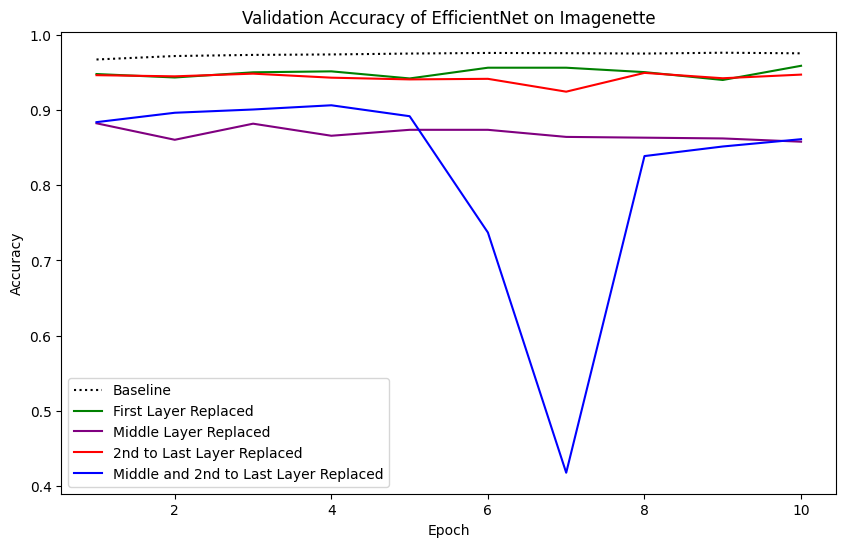

In [ ]:
#code for plotting the graphs below - just copy-pasted the val and training values into lists
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
num_epochs=10
epoch = [i for i in range(1,num_epochs+1)]
val_accuray_baseline=[0.9671, 0.9717, 0.9732, 0.9738, 0.9750, 0.9758, 0.9755, 0.9750, 0.9761, 0.9753]
val_accuray_first_replaced=[0.9477707006369427, 0.9431847133757961, 0.9500636942675159, 0.9513375796178344, 0.9419108280254777, 0.9561783439490446, 0.9561783439490446, 0.9503184713375796, 0.9398726114649681, 0.9587261146496815]
val_accuray_middle_replaced= [0.8822929936305732, 0.8603821656050955, 0.8817834394904459, 0.8657324840764331, 0.8736305732484076, 0.8736305732484076, 0.8642038216560509, 0.8631847133757962, 0.8621656050955414, 0.8578343949044586]
val_accuray_2ndlast_replaced= [0.9462420382165605, 0.9447133757961783, 0.94828025477707, 0.9429299363057325, 0.9406369426751592, 0.9414012738853503, 0.9243312101910828, 0.9492993630573249, 0.9421656050955414, 0.9470063694267515]
val_accuray_last_replaced= [0.944968152866242, 0.9515923566878981, 0.9470063694267515, 0.9515923566878981, 0.9431847133757961, 0.9592356687898089, 0.9485350318471337, 0.9462420382165605, 0.935796178343949, 0.9579617834394905]
val_accuray_middle_2ndlast_replaced= [0.8838216560509554, 0.8963057324840764, 0.9006369426751593, 0.9062420382165605, 0.89171974522293, 0.7370700636942675, 0.4178343949044586, 0.8387261146496815, 0.8514649681528662, 0.8611464968152867]
plt.plot(epoch, val_accuray_baseline, label="Baseline",color='black',linestyle=':')
plt.plot(epoch, val_accuray_first_replaced, label="First Layer Replaced",color='green')
plt.plot(epoch, val_accuray_middle_replaced, label="Middle Layer Replaced",color='purple')
# plt.plot(epoch, val_accuray_last_replaced, label="Last Layer Replaced",color='orange')
plt.plot(epoch, val_accuray_2ndlast_replaced, label="2nd to Last Layer Replaced",color='red')
plt.plot(epoch, val_accuray_middle_2ndlast_replaced, label="Middle and 2nd to Last Layer Replaced",color='blue')
plt.title("Validation Accuracy of EfficientNet on Imagenette")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.savefig('EfficientNet_Accuracy_compare.png', dpi=300)
plt.show()

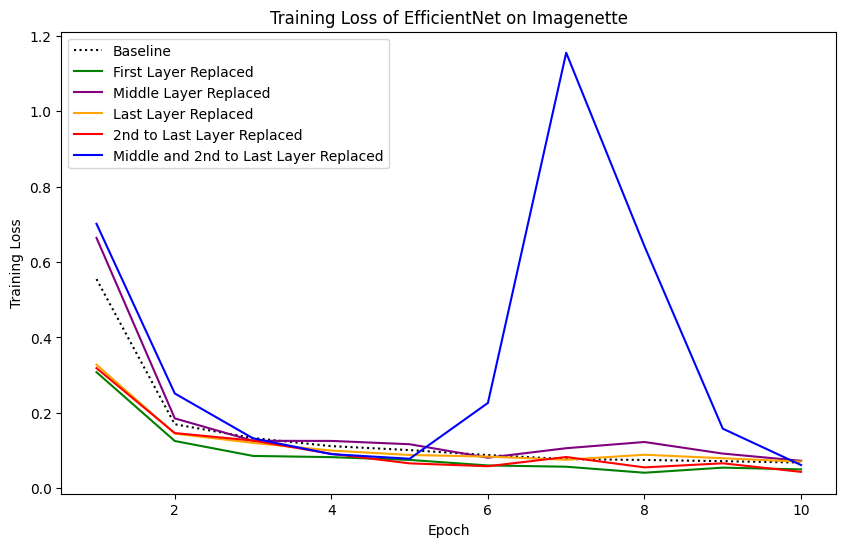

In [ ]:

plt.figure(figsize=(10, 6))
train_loss_baseline=[0.5547, 0.1694, 0.1329, 0.1114, 0.1009, 0.0877, 0.0771, 0.0747, 0.0715, 0.0678]
train_loss_first_replaced=[0.30764656423314196, 0.1250429212656879, 0.08540227125096764, 0.08219074263438783, 0.07480136376830775, 0.06013540639007162, 0.05676156625220854, 0.040834894521017184, 0.054327422554755735, 0.049598400308782035]
train_loss_middle_replaced= [0.6640109166100219, 0.18507155268830625, 0.1254911851421049, 0.1252630806152042, 0.11645534864903705, 0.08071976607076263, 0.105886530903533, 0.12237552750923135, 0.09164503595840526, 0.0724388102251986]
train_loss_2ndlast_replaced= [0.31840783251902544, 0.1460295004921185, 0.12614453079279614, 0.09106564843347548, 0.06568232942309633, 0.058039361179170725, 0.0825968105928041, 0.05498372959334882, 0.06580928520329385, 0.04307937768140078]
train_loss_last_replaced= [0.32752813086719124, 0.14467493892722838, 0.11987542980853971, 0.0997143439111627, 0.08797074221168973, 0.08358107432896095, 0.07529915879068368, 0.08856639362371375, 0.07926908930892602, 0.07020333375957971]
train_loss_middle_2ndlast_replaced= [0.7014728227781283, 0.2511954201335037, 0.13203523039024928, 0.09013904797894931, 0.07792432285527498, 0.22602112154473197, 1.155509135534836, 0.6418747562613036, 0.1577919390480462, 0.06119440667877112]
plt.plot(epoch, train_loss_baseline, label="Baseline",color='black',linestyle=':')
plt.plot(epoch, train_loss_first_replaced, label="First Layer Replaced",color='green')
plt.plot(epoch, train_loss_middle_replaced, label="Middle Layer Replaced",color='purple')
plt.plot(epoch, train_loss_last_replaced, label="Last Layer Replaced",color='orange')
plt.plot(epoch, train_loss_2ndlast_replaced, label="2nd to Last Layer Replaced",color='red')
plt.plot(epoch, train_loss_middle_2ndlast_replaced, label="Middle and 2nd to Last Layer Replaced",color='blue')
plt.title("Training Loss of EfficientNet on Imagenette")
plt.ylabel("Training Loss")
plt.xlabel("Epoch")
plt.legend()
plt.savefig('EfficientNet_loss_compare.png', dpi=300)
plt.show()
